In [23]:
import pandas as pd
import os
import sys
import glob
import json
from os.path import expanduser
import matplotlib.pyplot as plt                   # For graphics
import numpy as np
from agavepy.agave import Agave, AgaveError
from agavepy.files.download import files_download
%matplotlib inline

from transcriptic import commands, Container
from transcriptic.config import Connection
from transcriptic.jupyter import objects




%load_ext autoreload
%reload_ext autoreload
%autoreload 2

from pysd2cat.data import tx_fcs
from pysd2cat.analysis import live_dead_analysis as lda
from pysd2cat.analysis.Names import Names
from pysd2cat.analysis import biofab_live_dead_analysis as blda
from pysd2cat.plot import biofab_live_dead_plots as bldp

from pysd2cat.data import pipeline


Connection.from_file("~/.transcriptic")
tx_config = json.load(open(os.path.join(expanduser("~"), ".transcriptic")))
transcriptic_email = tx_config['email']
transcriptic_token = tx_config['token']


out_dir='.' # test harness output

experiments = [
    'experiment.uw_biofab.34601',
    'experiment.uw_biofab.34600',
    'r1dd37mcxv5pf4',
    'r1dk8xp9dymm54',
    'r1dmsrursbqwuz'
]

run_strain = {
    'experiment.uw_biofab.34600' : 'CEN.PK2 - MAT A',
    'experiment.uw_biofab.34601' : 'S288c_a',
    'r1dd37mcxv5pf4' : 'S288c_a',
    'r1dk8xp9dymm54' : 'S288c_a',
    'r1dmsrursbqwuz' : 'S288c_a'
}

experiment_lab = {
    'experiment.uw_biofab.34600' : 'BioFab',
    'experiment.uw_biofab.34601' : 'BioFab',
    'r1dd37mcxv5pf4' : 'TX',
    'r1dk8xp9dymm54' : 'TX',
    'r1dmsrursbqwuz' : 'TX'
}

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
run_id=experiments[4]
run_obj = tx_fcs.get_tx_run(run_id)
d = run_obj.data

def extract_time_point(x):
    return x.Name.split(' ')[3].split('_')[0]
def extract_time(x):
    return float(x['time_point']) * 0.5
def assign_container(prefix, x, containers):
    name = prefix + ' ' + x.time_point
    #print(containers)
    return next(c for c in containers.Containers if name in c.attributes['label'])


try:
    containers = run_obj.containers
except Exception as e:
    containers = run_obj.containers


flow_data = d.loc[d.Operation == 'flow_analyze']
flow_data.loc[:,'time_point'] = flow_data.apply(extract_time_point, axis=1)
flow_data.loc[:,'time'] = flow_data.apply(extract_time, axis=1)
flow_data.loc[:, 'container'] = flow_data.apply(lambda x: assign_container('Flow (Sytox) Plate', x, containers), axis=1)
flow_data.loc[:, 'container_name'] = flow_data.apply(lambda x: x['container'].attributes['label'], axis=1)
flow_data['time_point'] = flow_data['time_point'].astype('int64')
flow_data['time'] = flow_data['time'].astype('float')


flow_data

Attempting to fetch 16 datasets...


/Users/danbryce/Documents/sift/xplan/external/xplan/xplan-to-autoprotocol-reactor/xplan-dev-env/xplan-dev-env/lib/python3.7/site-packages/transcriptic/jupyter/objects.py:433: UserWarning: Missing key 'container' when initializing dataset
  warnings.warn("Missing key {} when initializing dataset".format(e))
/Users/danbryce/Documents/sift/xplan/external/xplan/xplan-to-autoprotocol-reactor/xplan-dev-env/xplan-dev-env/lib/python3.7/site-packages/transcriptic/jupyter/objects.py:882: UserWarning: ContainerType given is not supported yet in AP-Py
  warnings.warn("ContainerType given is not supported yet in AP-Py")
/Users/danbryce/Documents/sift/xplan/external/xplan/xplan-to-autoprotocol-reactor/xplan-dev-env/xplan-dev-env/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas

Name DataType     Operation AnalysisTool                                                      Datasets  time_point  time                         container         container_name
4   Flow (Sytox) Plate 12_6.0 hour  file     flow_analyze  None         <transcriptic.jupyter.objects.Dataset object at 0x131253d68>  12          6.0   Container(Flow (Sytox) Plate 12)  Flow (Sytox) Plate 12
5   Flow (Sytox) Plate 1_0.5 hour   file     flow_analyze  None         <transcriptic.jupyter.objects.Dataset object at 0x131253c88>  1           0.5   Container(Flow (Sytox) Plate 1)   Flow (Sytox) Plate 1 
6   Flow (Sytox) Plate 4_2.0 hour   file     flow_analyze  None         <transcriptic.jupyter.objects.Dataset object at 0x12e9b4b38>  4           2.0   Container(Flow (Sytox) Plate 4)   Flow (Sytox) Plate 4 
7   Flow (Sytox) Plate 5_2.5 hour   file     flow_analyze  None         <transcriptic.jupyter.objects.Dataset object at 0x13126e668>  5           2.5   Container(Flow (Sytox) Plate 5)   Flow (Sytox) Plate 5 
8   Flow (Sytox) Plate 7_3.5 hour   file     flow_analyze  None         <transcriptic.jupyter.objects.Dataset object at 0x13126e780>  7           3.5   Container(Flow (Sytox) Plate 7)   Flow (Sytox) Plate 7 
9   Flow (Sytox) Plate 8_4.0 hour   file     flow_analyze  None         <transcriptic.jupyter.objects.Dataset object at 0x131281e10>  8           4.0   Container(Flow (Sytox) Plate 8)   Flow (Sytox) Plate 8 
10  Flow (Sytox) Plate 9_4.5 hour   file     flow_analyze  None         <transcriptic.jupyter.objects.Dataset object at 0x1312817f0>  9           4.5   Container(Flow (Sytox) Plate 9)   Flow (Sytox) Plate 9 
11  Flow (Sytox) Plate 11_5.5 hour  file     flow_analyze  None         <transcriptic.jupyter.objects.Dataset object at 0x131281ef0>  11          5.5   Container(Flow (Sytox) Plate 11)  Flow (Sytox) Plate 11
12  Flow (Sytox) Plate 2_1.0 hour   file     flow_analyze  None         <transcriptic.jupyter.objects.Dataset object at 0x1312a2710>  2           1.0   Container(Flow (Sytox) Plate 2)   Flow (Sytox) Plate 2 
13  Flow (Sytox) Plate 3_1.5 hour   file     flow_analyze  None         <transcriptic.jupyter.objects.Dataset object at 0x1312a2e10>  3           1.5   Container(Flow (Sytox) Plate 3)   Flow (Sytox) Plate 3 
14  Flow (Sytox) Plate 6_3.0 hour   file     flow_analyze  None         <transcriptic.jupyter.objects.Dataset object at 0x1312bb630>  6           3.0   Container(Flow (Sytox) Plate 6)   Flow (Sytox) Plate 6 
15  Flow (Sytox) Plate 10_5.0 hour  file     flow_analyze  None         <transcriptic.jupyter.objects.Dataset object at 0x1312bbd30>  10          5.0   Container(Flow (Sytox) Plate 10)  Flow (Sytox) Plate 10

In [19]:
## Destructive (be careful)
#blda.drop_experiment_from_leader_board('.', 'r1dk8xp9dymm54')

In [93]:
leader_board_df = blda.get_leader_board_df('.', expand_description=True)
len(leader_board_df)

645

0.0
1


/Users/danbryce/Documents/sift/xplan/external/xplan/xplan-to-autoprotocol-reactor/xplan-dev-env/xplan-dev-env/lib/python3.7/site-packages/seaborn/distributions.py:423: UserWarning: The following kwargs were not used by contour: 'dropna'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


2
3
4
5
6
7
8
9
10
11
12
140.0
1
2
3
4
5
6
7
8
9
10
11
12
210.0
1
2
3
4
5
6
7
8
9
10
11
12
280.0
1
2
3
4
5
6
7
8
9
10
11
12
1120.0
1
2
3
4
5
6
7
8
9
10
11
12
{'dead': {0.0: [259, 363, 198, 166, 285, 335, 435, 440, 292, 332, 282, 252], 140.0: [1412, 5644, 7286, 1394, 6080, 3428, 1710, 3208, 5538, 2334, 1954, 1533], 210.0: [5011, 22723, 27217, 5367, 17298, 13050, 10109, 9777, 22138, 9629, 17782, 5139], 280.0: [13228, 64810, 57998, 15379, 31311, 22296, 13854, 14451, 38670, 20176, 25358, 13715], 1120.0: [113891, 119775, 119776, 119912, 96881, 101862, 118148, 112537, 111382, 105154, 113555, 113889]}, 'live': {0.0: [119741, 92405, 92291, 93170, 93708, 97891, 101491, 106022, 112511, 115403, 119718, 119748], 140.0: [110714, 97737, 95446, 99098, 94263, 100414, 106101, 107121, 106473, 108820, 110790, 110593], 210.0: [114989, 97277, 92783, 114633, 102702, 106950, 109891, 110223, 97862, 110371, 102218, 114861], 280.0: [106772, 49026, 59711, 98722, 81335, 90416, 100551, 104423, 81330, 99824, 94642,

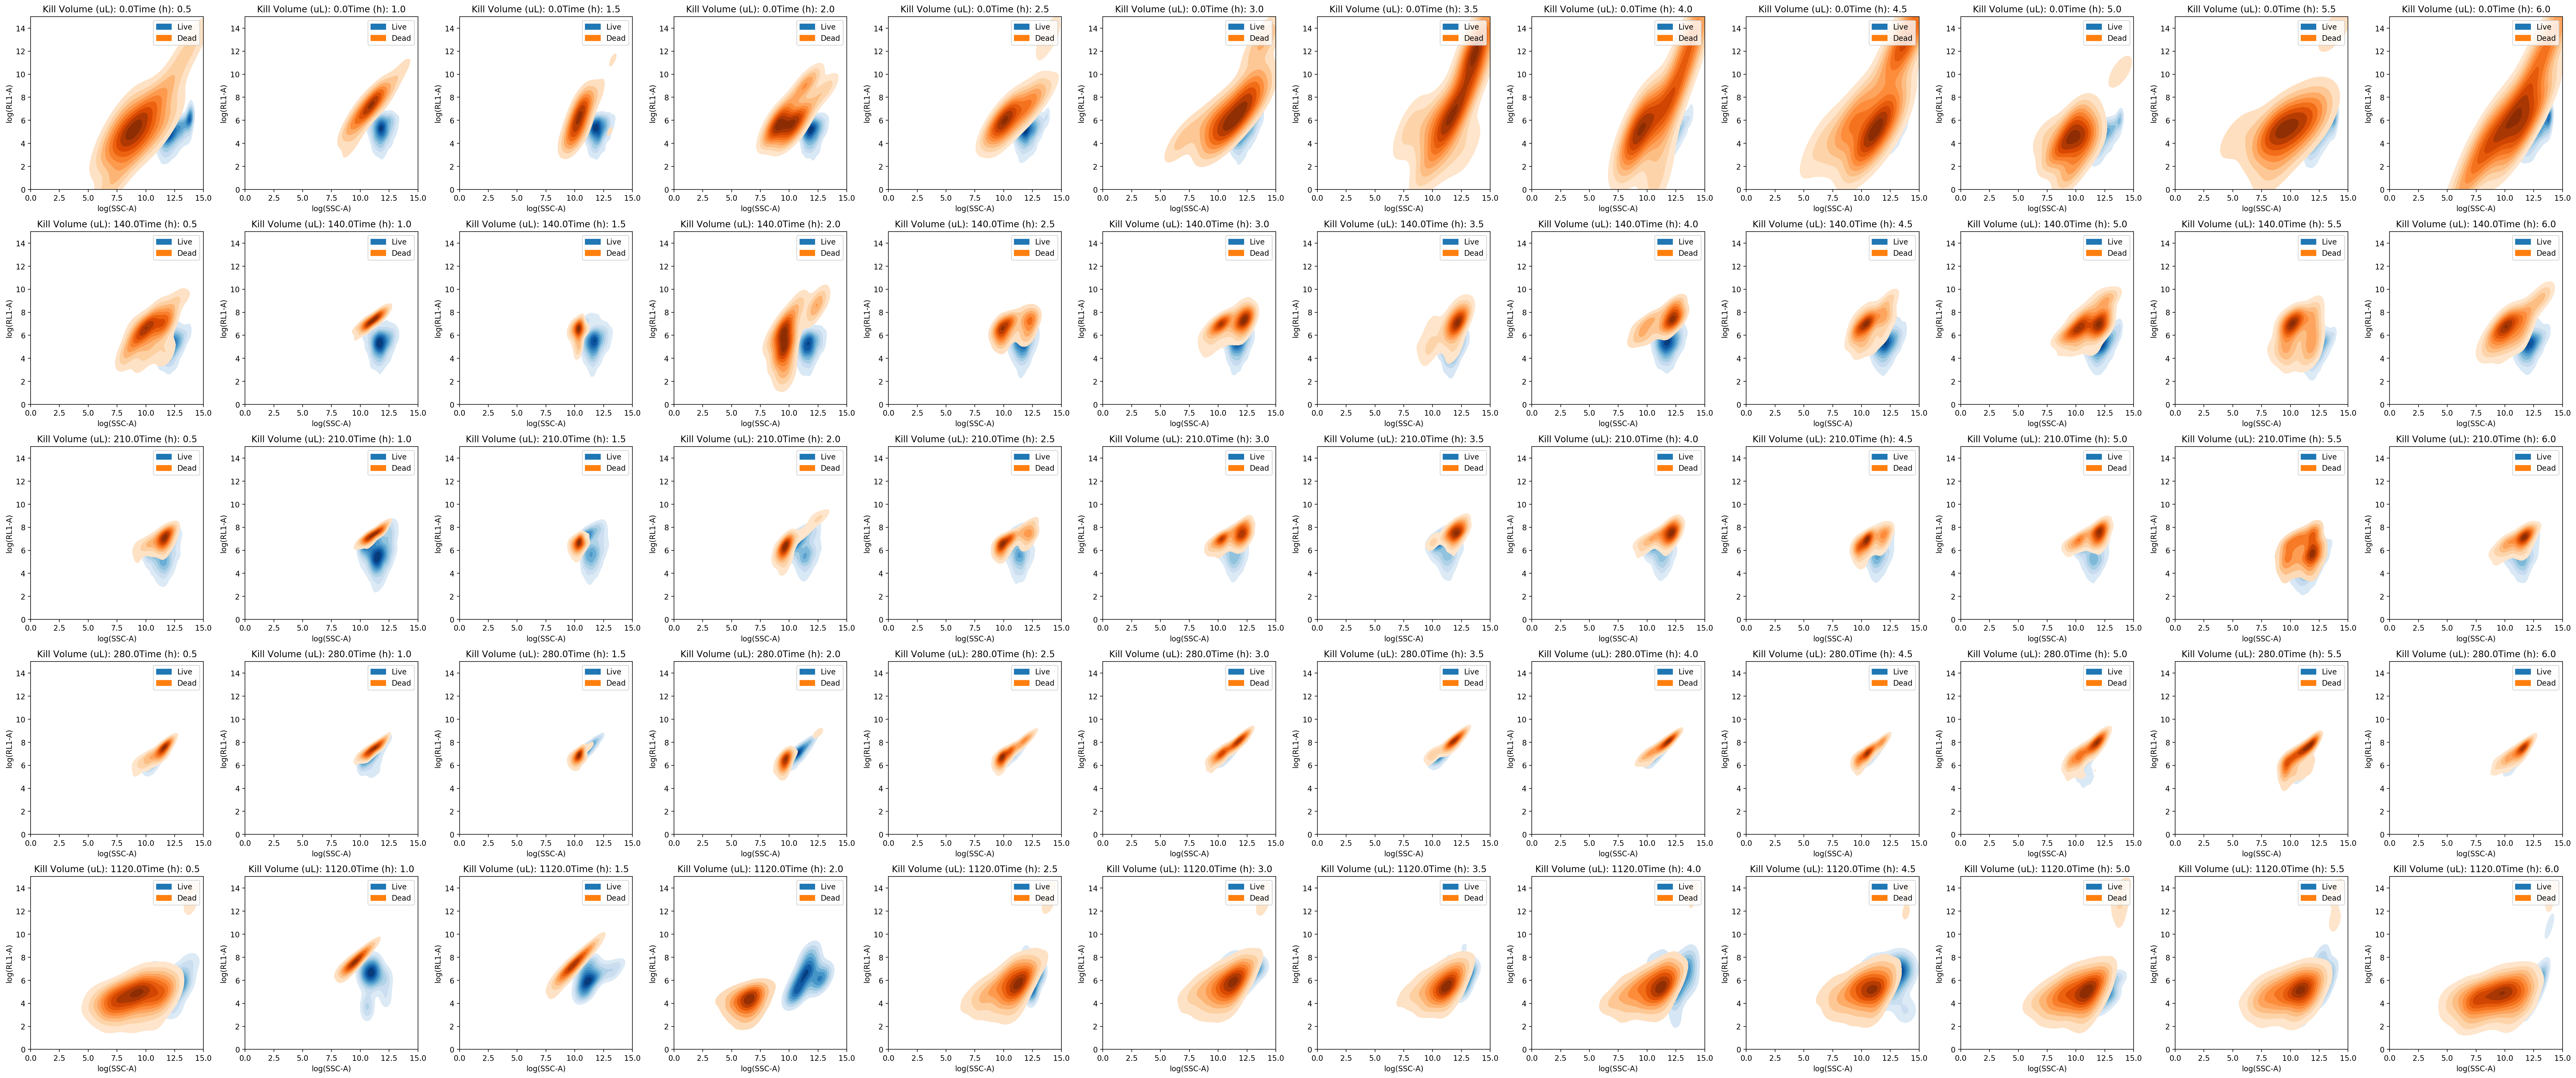

In [45]:
## Plot the time series channels with predictions

import seaborn as sns
prediction_files = glob.glob('data/transcriptic/r1dmsrursbqwuz/*/data.csv')
def get_time_point(pf):
    return int(pf.split("_")[-1].split('/')[0])
prediction_files = {get_time_point(p) : p for p in prediction_files}
time_points = list(prediction_files.keys())
time_points.sort()


df = pd.read_csv(prediction_files[1], index_col=0)
kill_volumes = list(df.kill_volume.dropna().unique())
kill_volumes.sort()

fig, ax = plt.subplots(ncols=len(time_points), nrows=len(kill_volumes), figsize=(4*len(time_points), 4*len(kill_volumes)), dpi=200)
xcol = 'SSC-A'
ycol = 'RL1-A'
stain = "SYTOX Red Stain"

num_points = {'dead' : {k: [] for k in kill_volumes}, "live" : {k: [] for k in kill_volumes}}

for i, row in enumerate(ax):
    kill_volume = kill_volumes[i]
    print(kill_volume)
    for j, col in enumerate(row):
    #    case="Dead"
    #    color='Reds'
    #    if i == 1:
    #        case = "Live"
    #        color='Blues'

        time_point = time_points[j]
        print(time_point)
        time = flow_data.loc[flow_data.time_point == time_point].time.iloc[0]
        df = pd.read_csv(prediction_files[time_point], index_col=0)


        plot_df = df.loc[(df.stain == stain) & (df.kill_volume == kill_volume)]
        live_df = plot_df.loc[plot_df.live == 1]
        dead_df = plot_df.loc[plot_df.live == 0]
        #live_df = plot_df.loc[plot_df.live == i]

        num_points['dead'][kill_volume].append(len(dead_df))
        num_points['live'][kill_volume].append(len(live_df))

        live_df = live_df.sample(frac=0.1)
        live_df = live_df[[xcol, ycol]].apply(np.log).replace([-np.inf, np.inf], np.nan).dropna(how="any")
        dead_df = dead_df.sample(frac=0.1)
        dead_df = dead_df[[xcol, ycol]].apply(np.log).replace([-np.inf, np.inf], np.nan).dropna(how="any")

        
        #print(live_df[xcol].unique())
        #print(live_df[ycol].unique())
        #print(dead_df[xcol].unique())
        #print(dead_df[ycol].unique())

        try:
            sns.kdeplot(live_df[xcol], live_df[ycol], ax=col,  cmap="Blues", shade=True, label="Live", shade_lowest=False, 
                dropna=True)
        except Exception as e:
            pass
        try:
            sns.kdeplot(dead_df[xcol], dead_df[ycol], ax=col,  cmap="Oranges", shade=True, label="Dead",shade_lowest=False,
                dropna=True)
            col.legend()
        except Exception as e:
            pass
        col.set_xlabel("log({})".format(xcol))
        col.set_ylabel("log({})".format(ycol))
    #        col.set_xscale('log')
    #        col.set_yscale('log')
        col.set_xlim(0, 15)
        col.set_ylim(0, 15)
        col.set_title("Kill Volume (uL): " + str(kill_volume) + "Time (h): " + str(time))
        #break


plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

print(num_points)


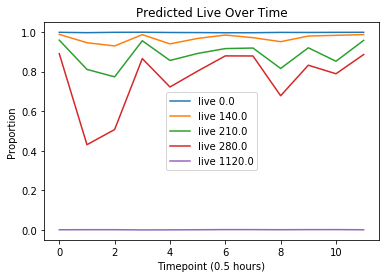

In [50]:
counts = num_points #{'dead': [409100, 406490, 407167, 405627, 405311, 412372, 437616, 454782, 449720, 457355, 457200, 447489], 'live': [70900, 73510, 72833, 74373, 74689, 67628, 42384, 25218, 30280, 22645, 22800, 32511]}

for volume in counts['live'].keys():
    for i in range(len(counts['live'][volume])):
        n = counts['dead'][volume][i] + counts['live'][volume][i]
        counts['dead'][volume][i] /= n
        counts['live'][volume][i] /= n

#plt.plot(counts['dead'], c='r', label='dead')
for volume in counts['live'].keys():
    plt.plot(counts['live'][volume],  label='live '+ str(volume))
plt.title("Predicted Live Over Time")
plt.xlabel("Timepoint (0.5 hours)")
plt.ylabel("Proportion")
plt.legend()

No handles with labels found to put in legend.


12    10
11    10
10    10
9     10
8     10
7     10
6     10
5     10
4     10
3     10
2     10
1     10
Name: time_point, dtype: int64


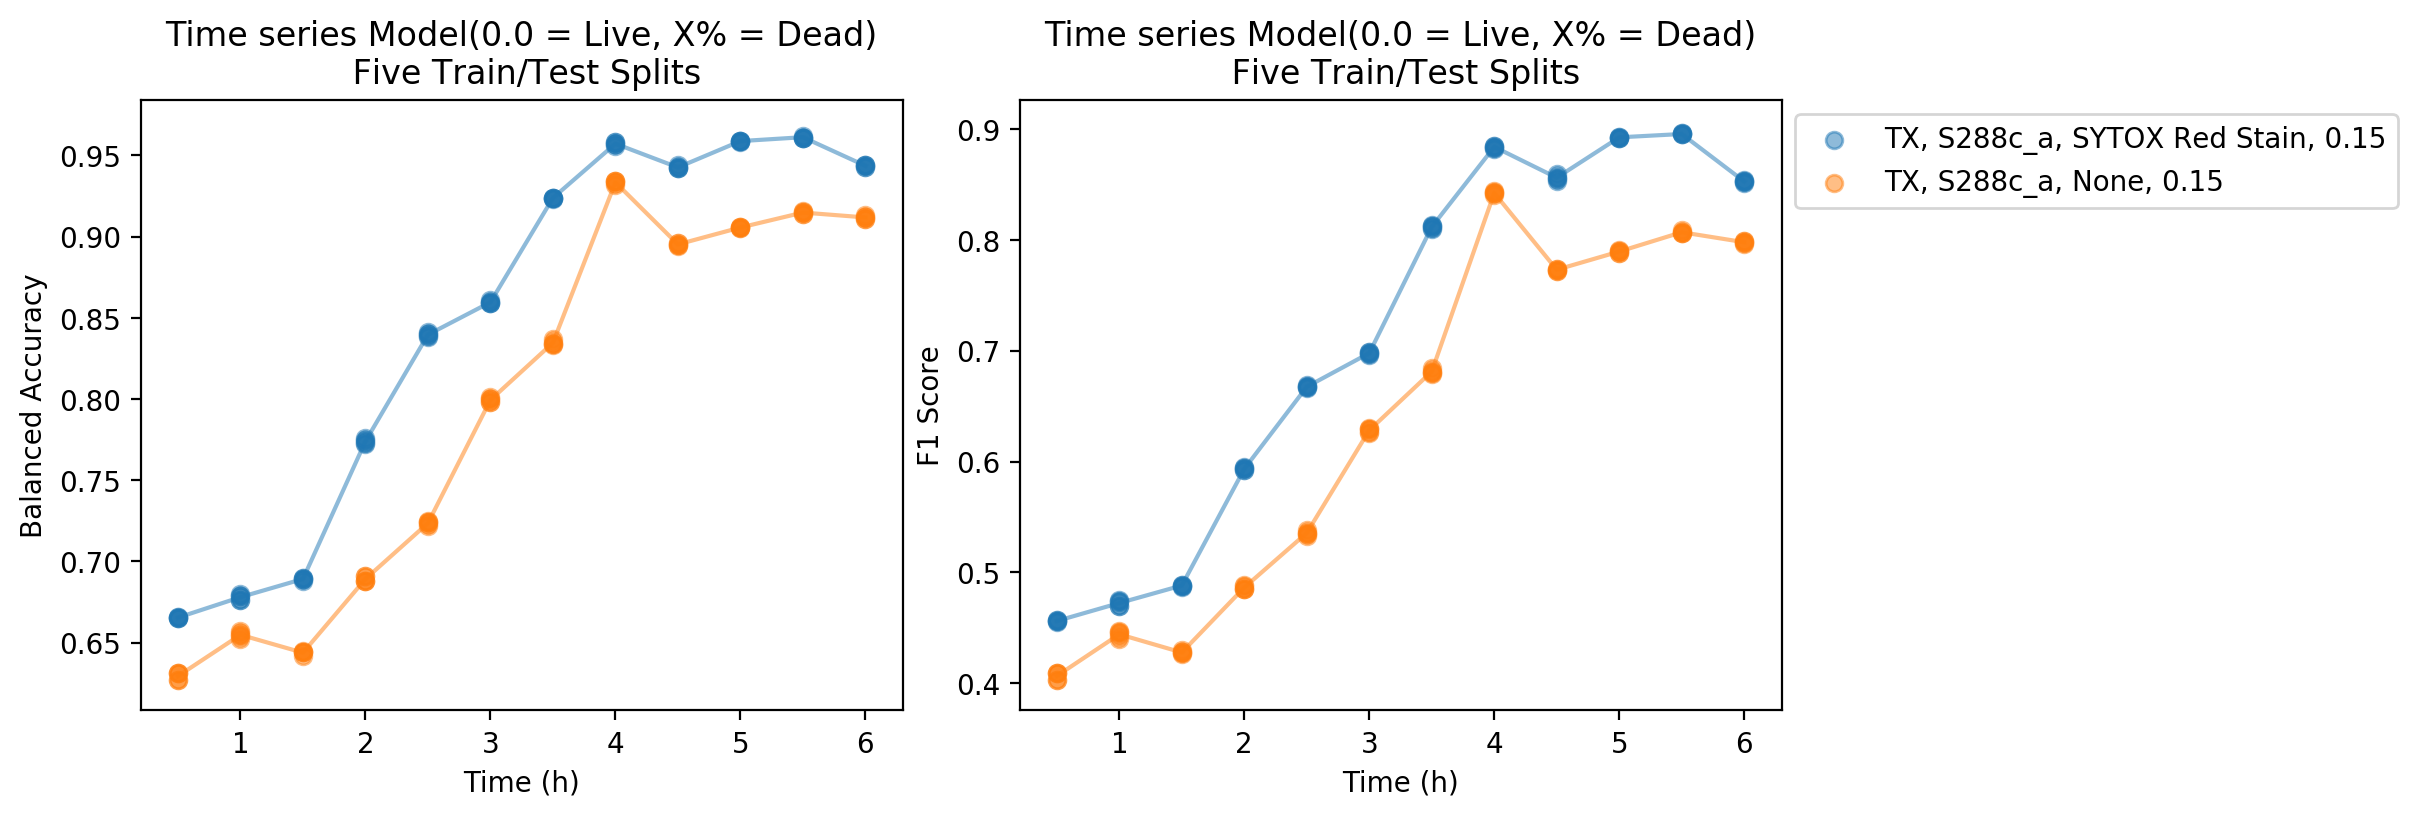

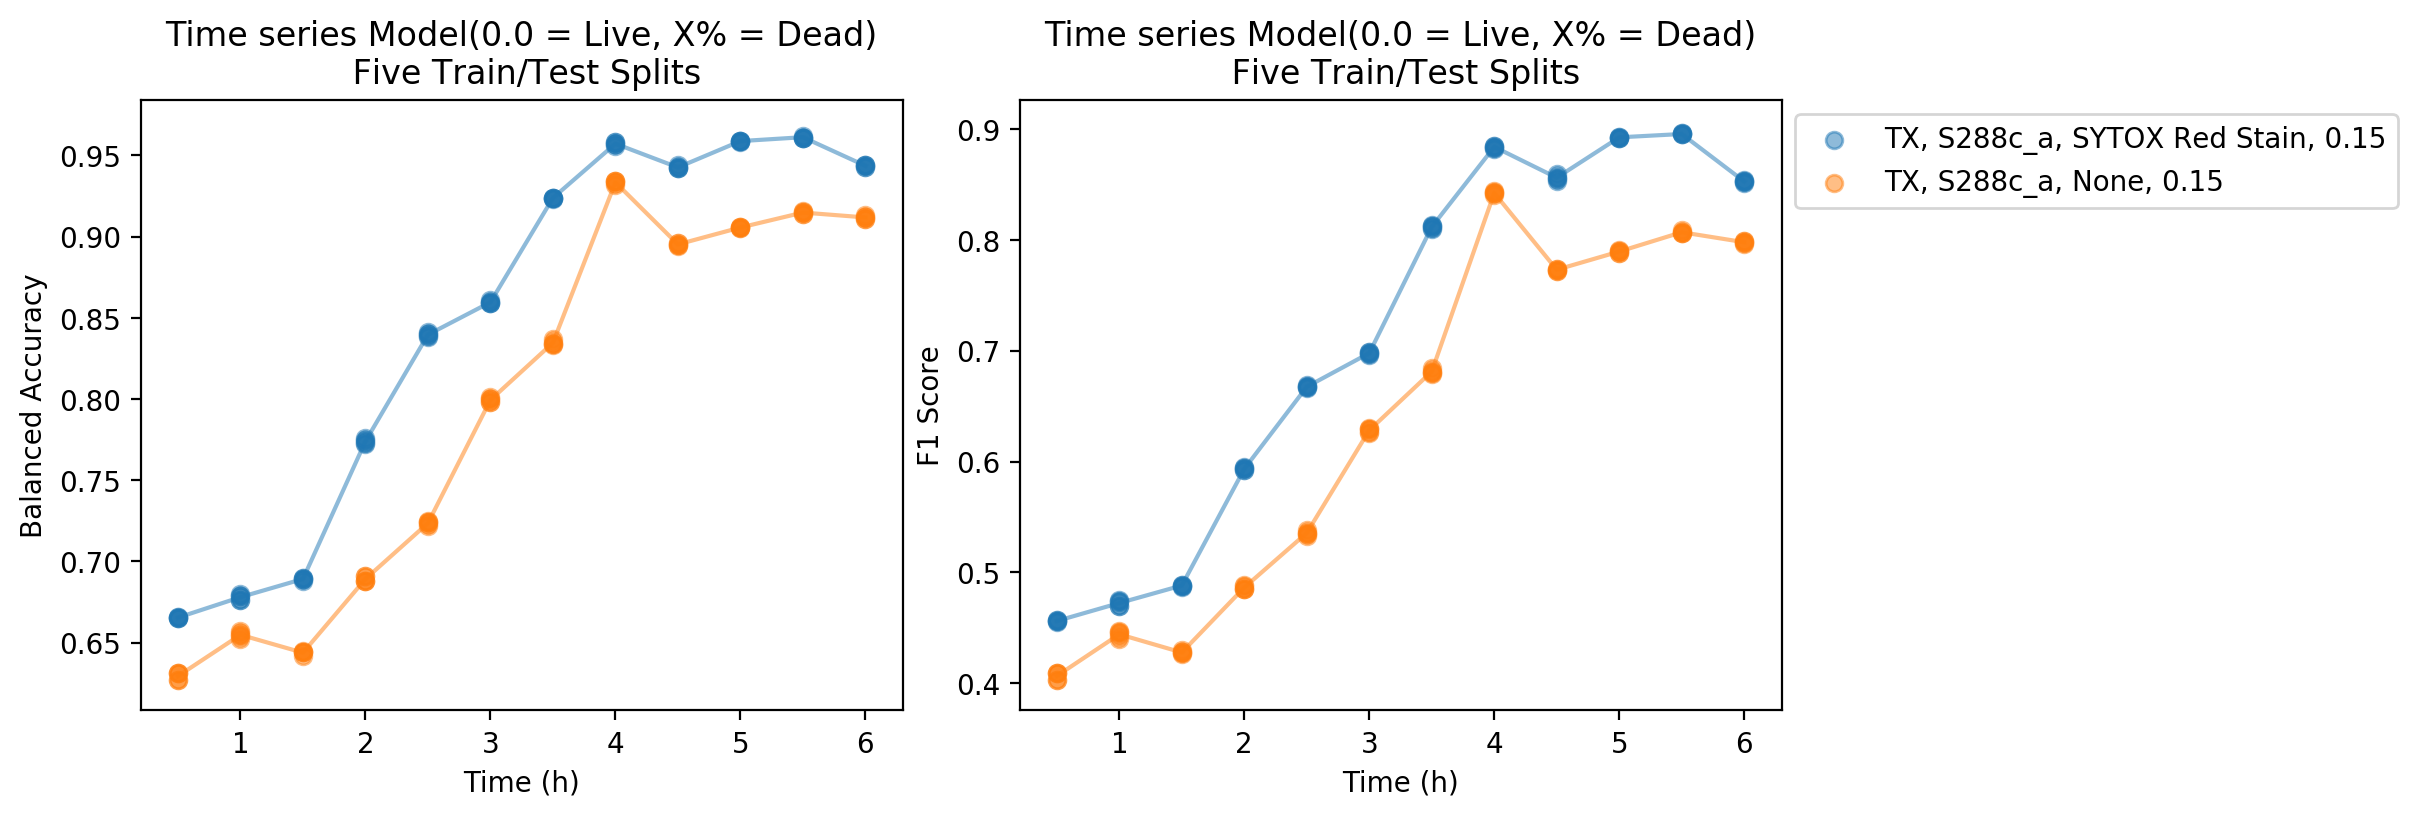

In [91]:
df = leader_board_df.loc[leader_board_df['Data and Split Description'].str.contains('r1dk8xp9dymm54')]
df = df.dropna(subset=['time_point'])
df = df.astype({'time_point': 'int32'})
print(df.time_point.value_counts())
bldp.get_statistics_by_time(df.merge(flow_data, on='time_point'), experiment_strain=run_strain, experiment_lab=experiment_lab)


In [14]:
data_dir = os.path.join('data/transcriptic')
data_files = glob.glob(data_dir + '/r1dk8xp9dymm54/*/data.csv')
#print(data_files)
channels=['FSC-A', 'SSC-A', 'BL1-A', 'RL1-A', 'FSC-H', 
                                      'SSC-H', 'BL1-H', 'RL1-H', 'FSC-W', 'SSC-W',
                                      'BL1-W', 'RL1-W']

mean_channel_df = pd.DataFrame()
for data_file in data_files:
    data_file_df = pd.read_csv(data_file, index_col=0)
    print(data_file_df.head(1))
    data_file_df = data_file_df.fillna('None').groupby(['kill_volume', 'stain']).agg(np.mean).reset_index()
    time_point = data_file.split("_")[-1].split('/')[0]
    data_file_df.loc[:,'time_point'] = int(time_point)
    mean_channel_df = mean_channel_df.append(data_file_df, ignore_index=True)
mean_channel_df
    


                                   checksum                                                                                                                        filename     kill  kill_volume            stain well   experiment_id   Time    FSC-A    SSC-A  BL1-A  RL1-A    FSC-H    SSC-H  BL1-H  RL1-H  FSC-W  SSC-W  BL1-W  RL1-W
0  0d521a2b611bcddf7963e89357d26ada0580caaa  data/transcriptic/r1dk8xp9dymm54/Flow_(Sytox)_Plate_11/fcs/CellDeath-EtOH-09-19-2019-T11_Sytox-YeastGates_SytoxYG-Plate_B5.fcs  Ethanol  300.0        SYTOX Red Stain  b5   r1dk8xp9dymm54  306.0  25459.0  81259.0  48.0   714.0  24654.0  75053.0  71.0   792.0  26.0   40.0   0.0    0.0  
                                   checksum                                                                                                                      filename     kill  kill_volume            stain well   experiment_id  Time      FSC-A      SSC-A   BL1-A    RL1-A    FSC-H     SSC-H  BL1-H   RL1-H   FSC-W   SSC-W  BL1-W  RL1-W

kill_volume            stain         Time          FSC-A          SSC-A      BL1-A        RL1-A         FSC-H          SSC-H      BL1-H       RL1-H       FSC-W       SSC-W     BL1-W     RL1-W  time_point
0   0.0          None             1576.869967  160227.826658  340548.060750  63.599825  112.913908   59130.126833  169435.752417  73.293967  108.704067  94.278983   134.602242  0.000000  0.000175  11        
1   0.0          SYTOX Red Stain  1452.135325  164018.515075  354484.252075  62.831792  145.076300   59499.765825  174879.811017  72.494667  134.628792  95.358392   137.882142  0.000000  0.000883  11        
2   300.0        None             4893.235715  65369.074950   98501.271781   32.671671  129.788004   49491.886542  74894.108492   79.240435  139.375162  40.161954   44.897052   0.000000  0.051515  11        
3   300.0        SYTOX Red Stain  5136.962523  67437.624392   98190.347708   31.463402  1119.186910  48735.710710  72221.959402   80.011933  899.316869  41.761842   46.006804   0.000000  0.105313  11        
4   0.0          None             4765.308750  80460.250100   180466.014117  19.542242  98.269058    55030.471308  123652.240783  74.327092  121.124525  46.594800   63.028933   0.000933  0.047275  1         
5   0.0          SYTOX Red Stain  4190.587808  79114.184600   175666.892792  23.149950  89.135200    55033.189933  122576.065275  71.458067  161.063108  46.010833   61.485233   0.000000  0.032983  1         
6   300.0        None             3085.987169  82152.568598   171893.635583  25.414235  64.804160    56172.971423  118451.641306  72.237104  114.497150  46.920996   61.294938   0.000000  0.006692  1         
7   300.0        SYTOX Red Stain  2833.342056  84396.193779   164816.992369  26.321194  205.954704   56712.292300  112406.361875  73.779306  261.528765  47.922535   60.697556   0.000025  0.026085  1         
8   0.0          None             1894.314758  125936.888092  279283.261492  41.954075  82.077092    57696.658175  150152.564042  72.138917  108.825175  71.943158   103.224792  0.000150  0.000617  6         
9   0.0          SYTOX Red Stain  1891.717867  144930.630825  302942.571783  50.337725  121.818700   58910.093933  158281.860767  72.317425  148.953550  83.903492   118.630775  0.000000  0.000200  6         
10  300.0        None             3513.112908  120630.240063  213025.868802  45.310713  189.501552   59796.932694  119232.480350  83.204719  144.700185  66.763987   84.037460   0.000056  0.075829  6         
11  300.0        SYTOX Red Stain  3448.986319  83761.891869   141985.015773  38.706356  850.966046   52971.798023  92973.666027   78.153398  686.925444  49.755648   59.619660   0.000000  0.041162  6         
12  0.0          None             1662.506950  150960.379683  327865.940883  57.582192  104.315733   58318.374367  166706.967883  72.034050  105.243375  88.912667   127.422917  0.000000  0.000192  10        
13  0.0          SYTOX Red Stain  1250.670392  207834.424825  399402.873525  93.232075  227.187925   62411.102908  192780.223533  75.382175  157.185583  126.801850  171.652942  0.000000  0.000917  10        
14  300.0        None             4391.660756  66316.628402   103209.878737  31.461852  111.836877   50022.950881  78117.409808   78.035956  132.236235  40.474956   45.956150   0.000000  0.037792  10        
15  300.0        SYTOX Red Stain  4283.922469  66888.163808   97502.370625   30.887121  937.782160   49115.224098  72455.518204   80.076321  789.577648  41.112988   45.342231   0.000000  0.083817  10        
16  0.0          None             3293.725817  90271.169858   208847.851600  25.767933  64.965508    56921.068983  134319.730775  72.474467  110.701567  51.096542   71.148567   0.000000  0.009942  3         
17  0.0          SYTOX Red Stain  2672.998767  93409.570217   214189.577625  25.631758  72.957958    57511.615333  135235.743517  72.150983  166.004483  52.489017   72.955017   0.000000  0.001375  3         
18  300.0        None             2744.626852  87950

In [35]:
flow_data.dtypes

Name              object
DataType          object
Operation         object
AnalysisTool      object
Datasets          object
time_point        int32 
time              object
container         object
container_name    object
dtype: object

['None' 'SYTOX Red Stain']


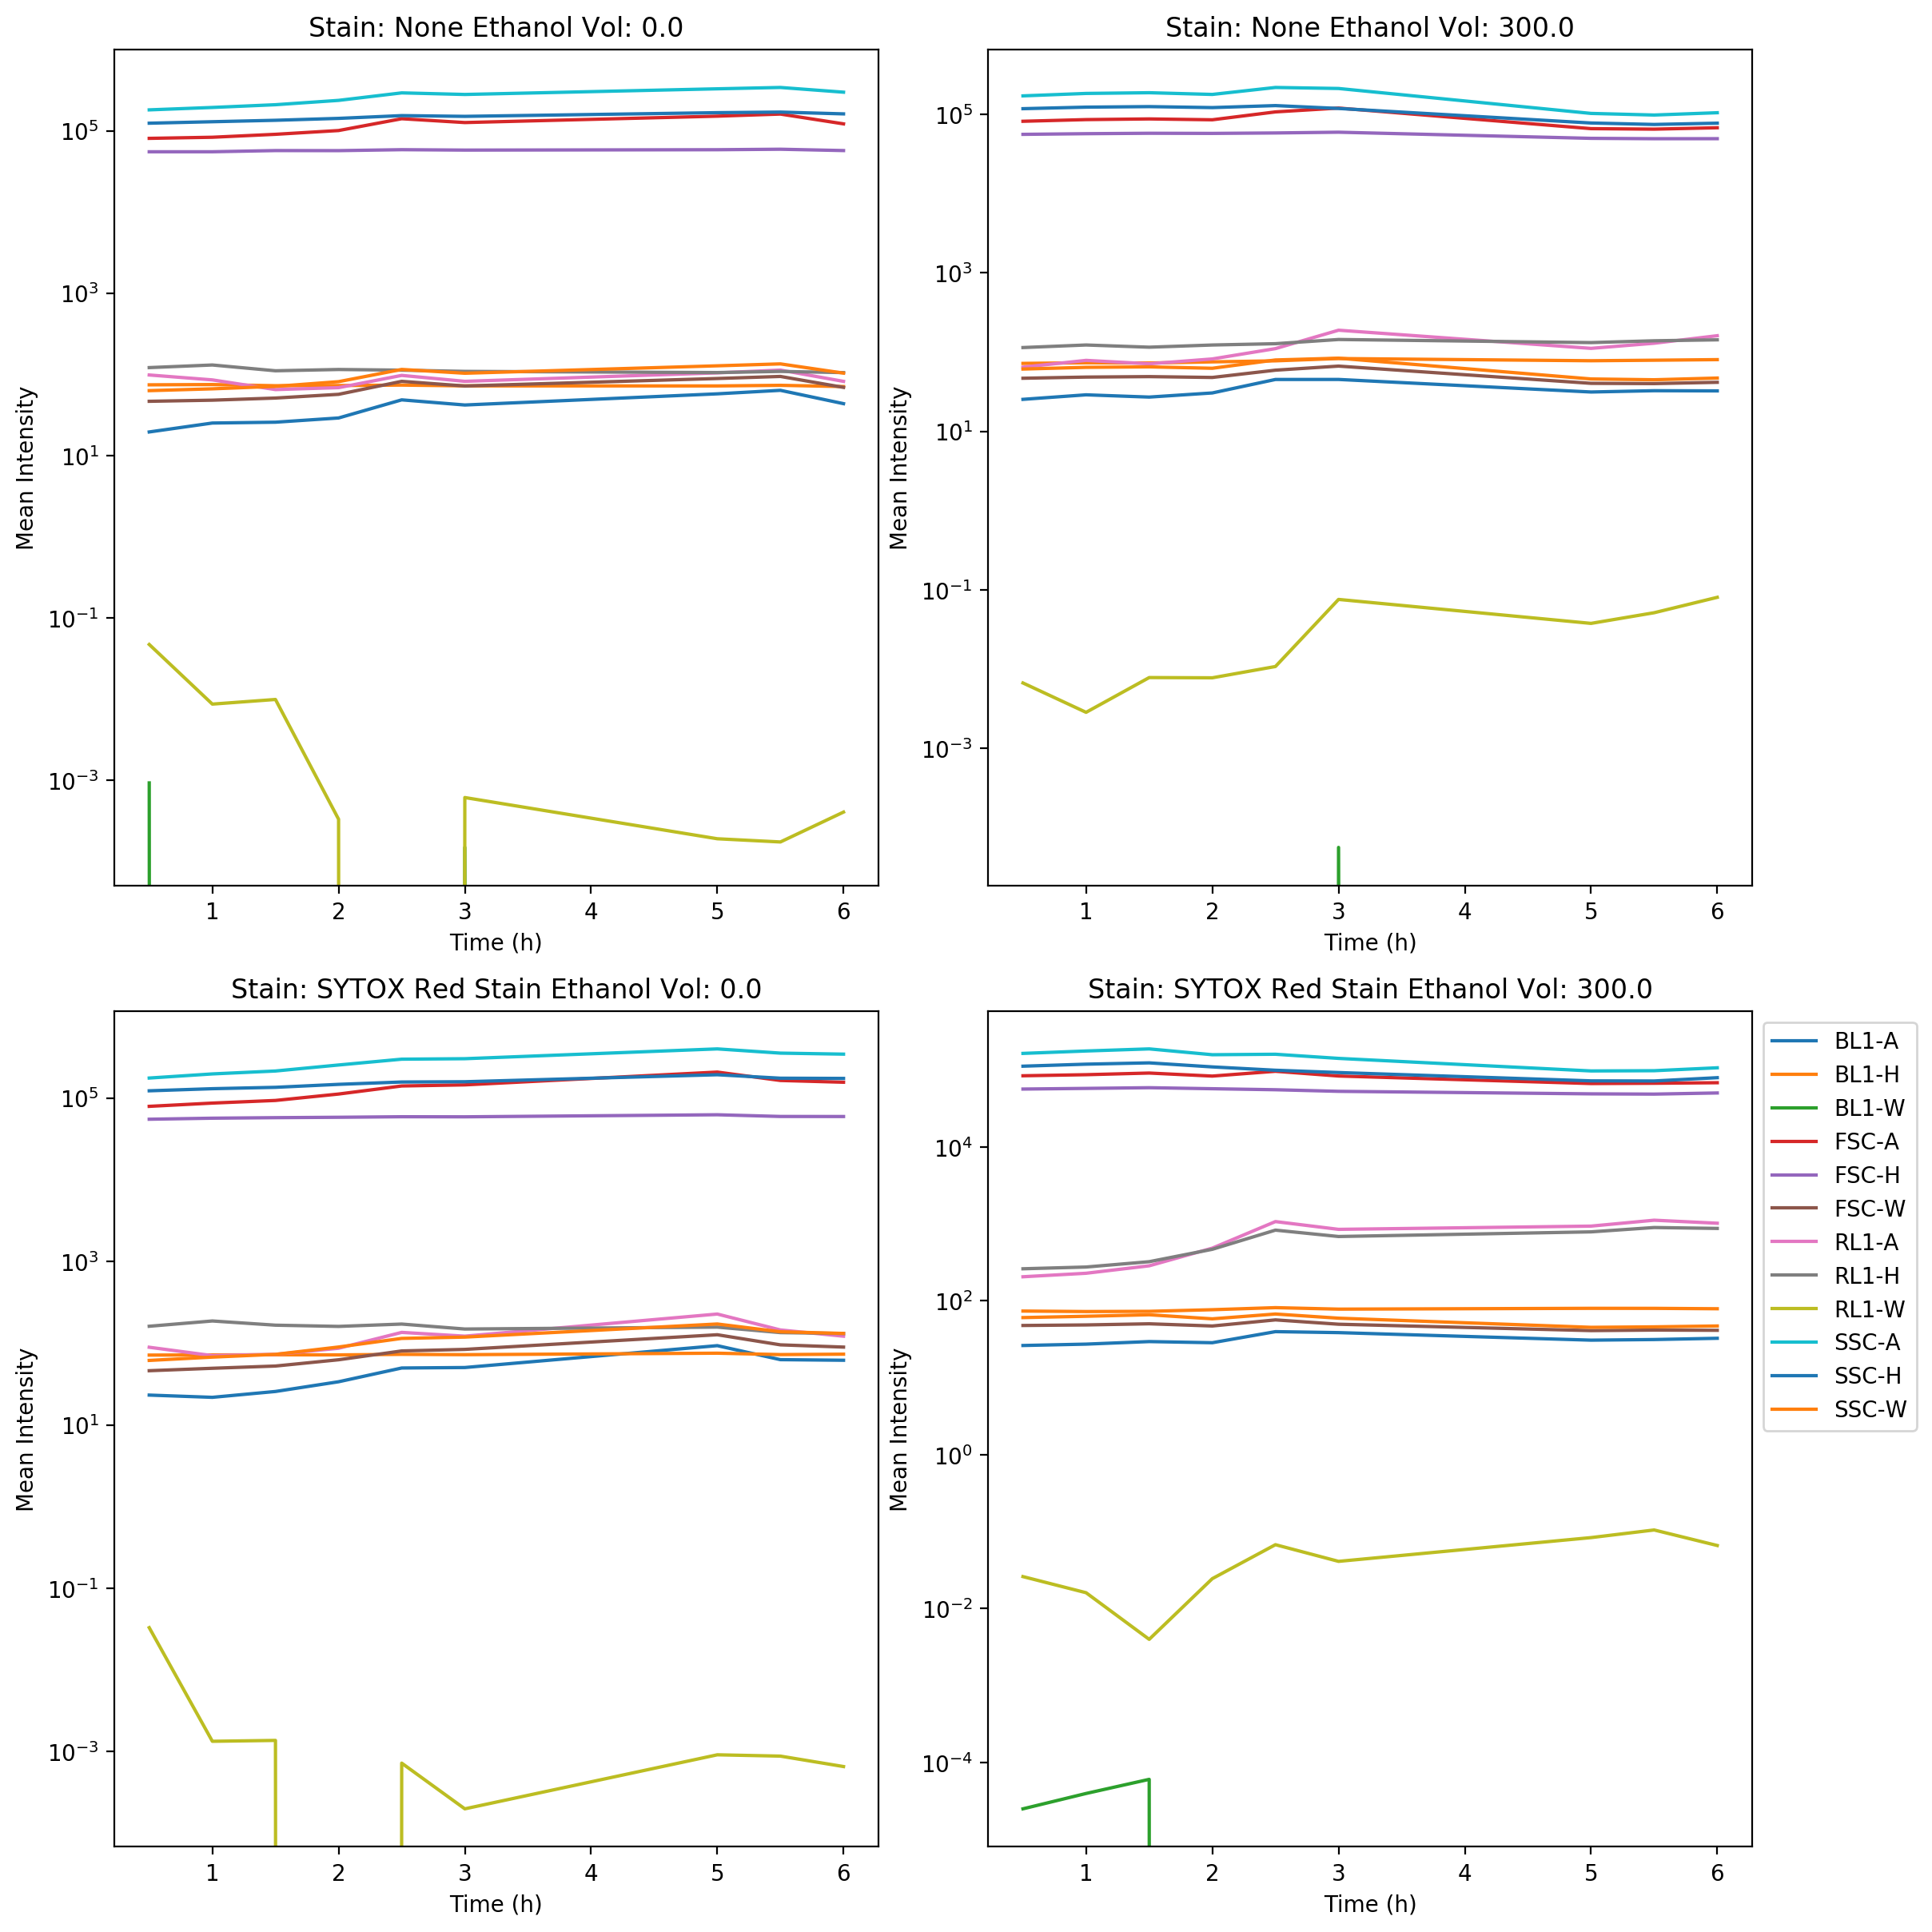

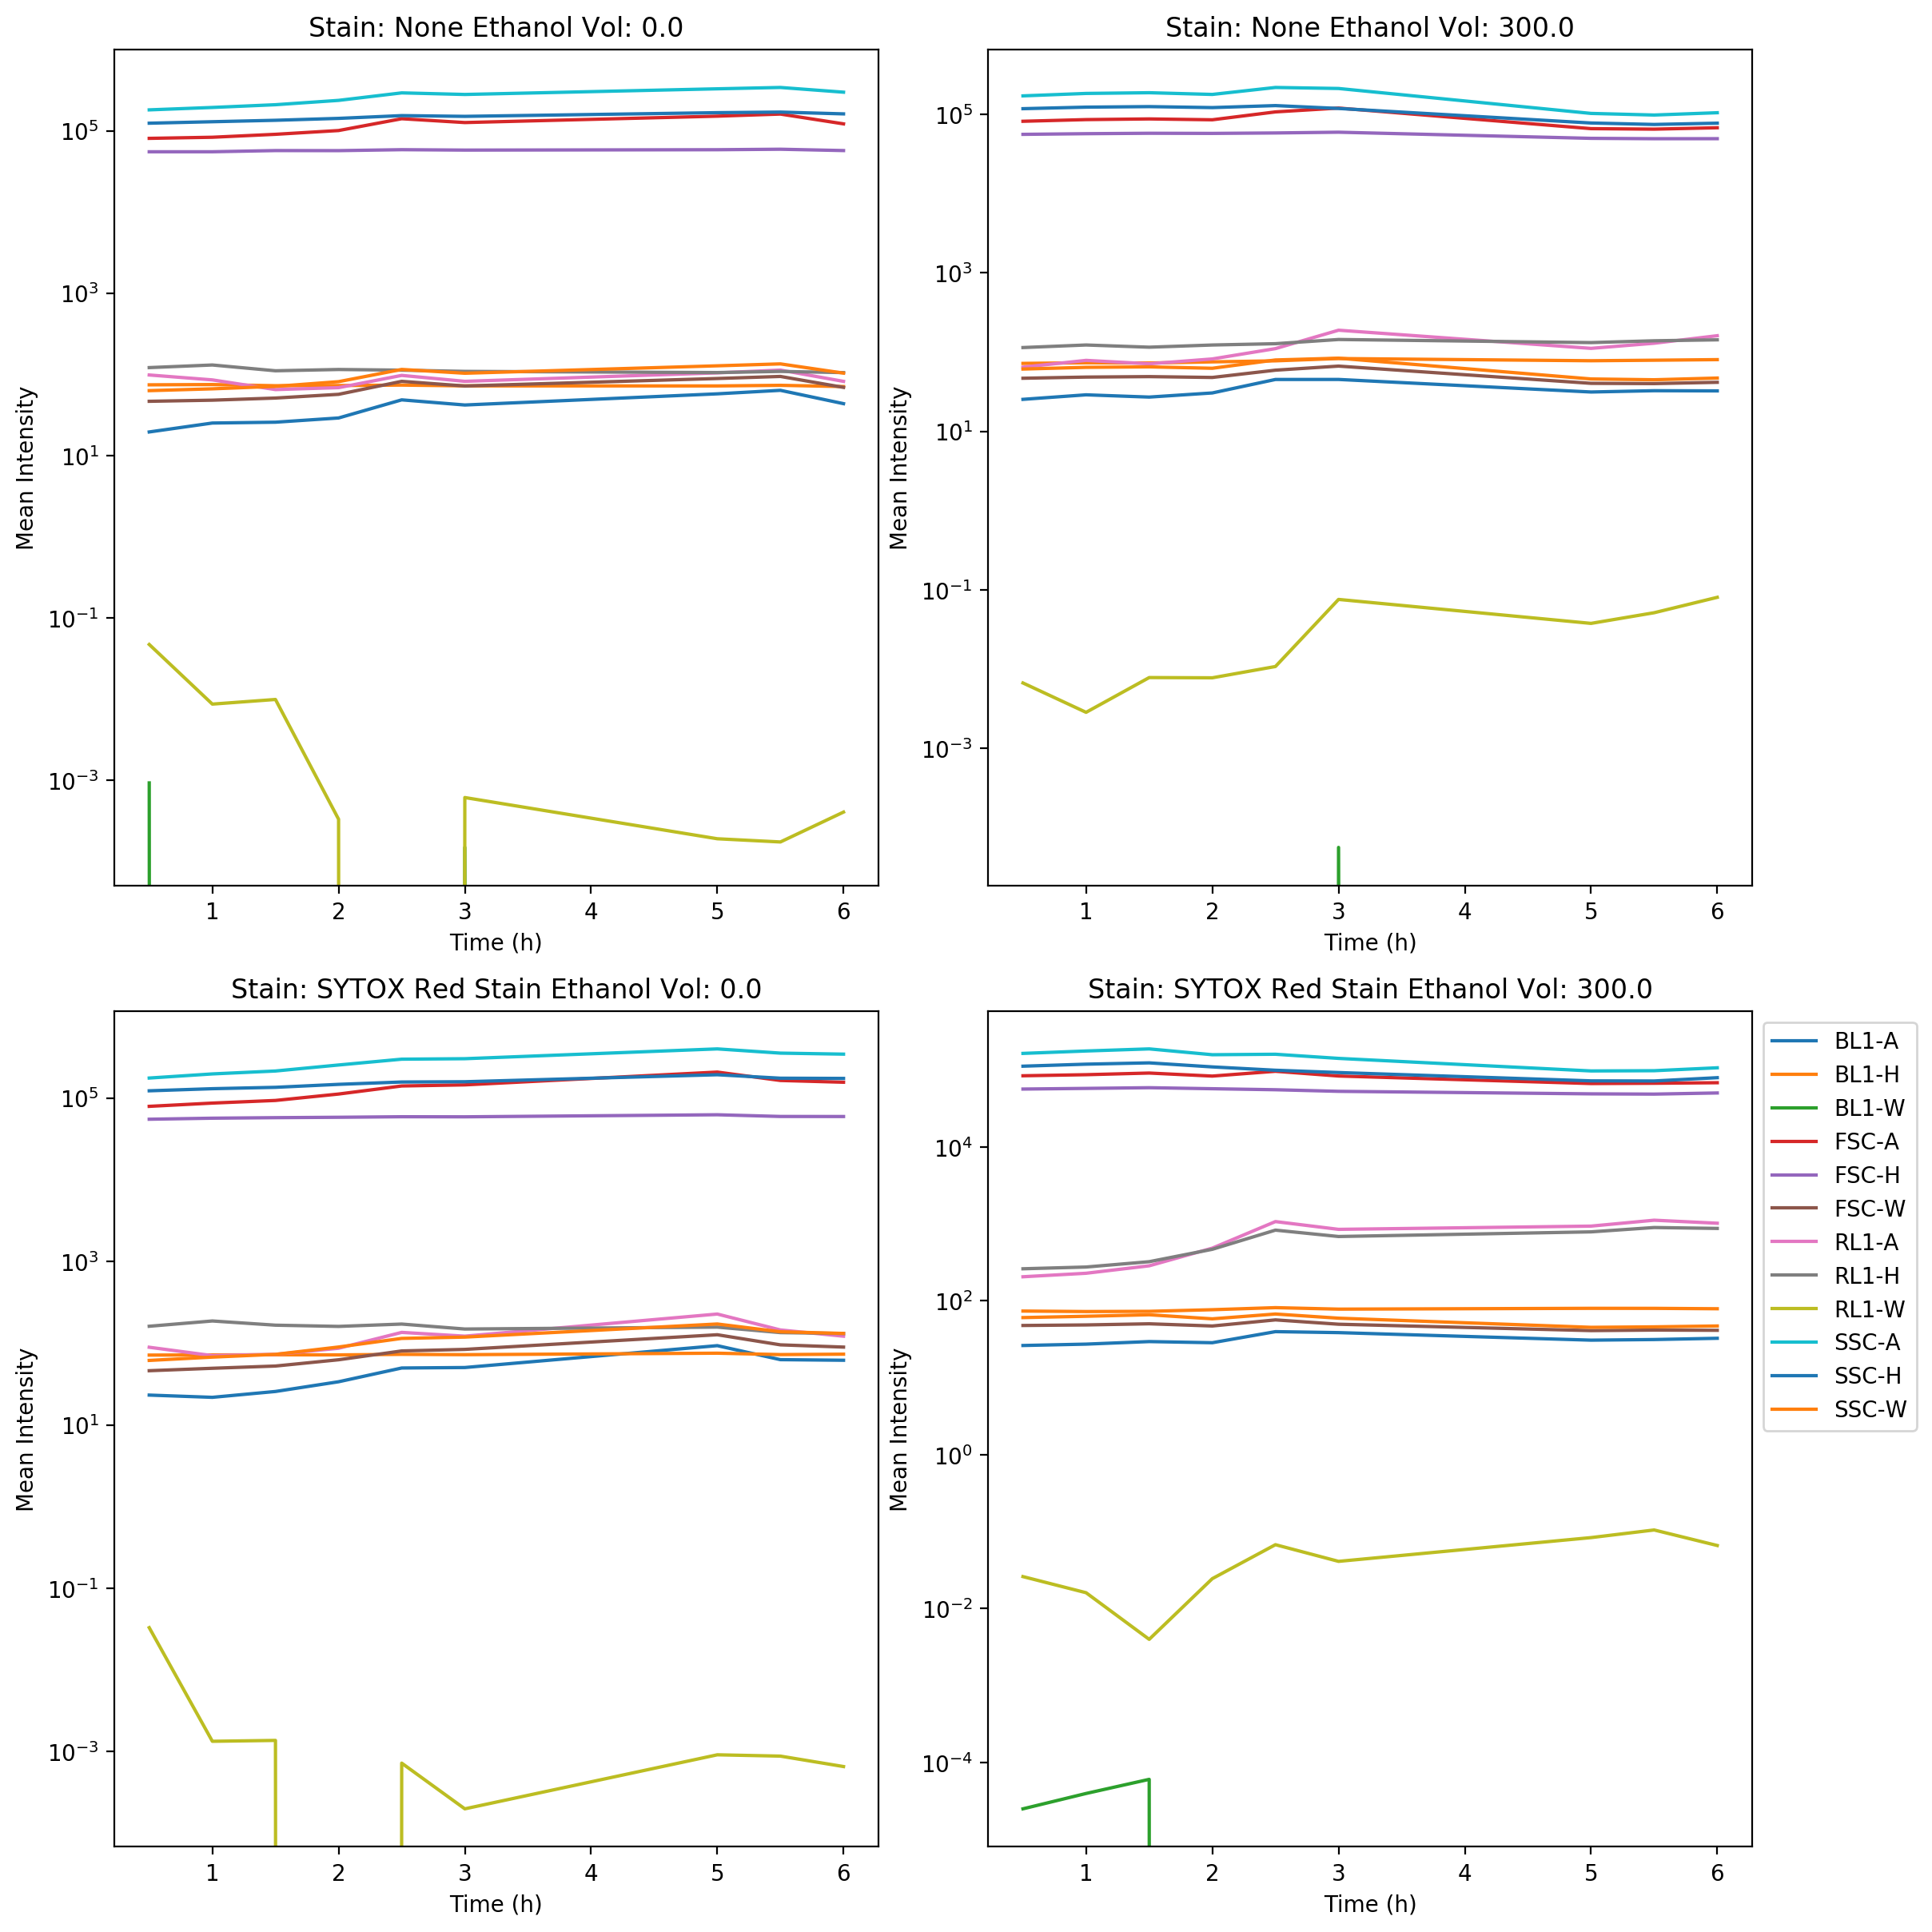

In [46]:
mean_channel_df1 = mean_channel_df.merge(flow_data, how='left', on='time_point')

#channels=['FSC-A', 'SSC-A', 'RL1-A']
channels=['FSC-A', 'SSC-A', 'BL1-A', 'RL1-A', 'FSC-H', 
                                      'SSC-H', 'BL1-H', 'RL1-H', 'FSC-W', 'SSC-W',
                                      'BL1-W', 'RL1-W']

bldp.get_channel_mean_timeseries(mean_channel_df1, 
                               channels=channels
                               )

In [4]:
leader_board_df = blda.get_leader_board_df('.', expand_description=True)
#leader_board_df.loc[leader_board_df['stain'].isna()]
bldp.get_statistics_by_volume(leader_board_df, experiment_strain=run_strain, experiment_lab=experiment_lab)

NameError: name 'bldp' is not defined

(<Figure size 1600x800 with 2 Axes>, mean    0.011648
 std     0.018305
 dtype: float64)

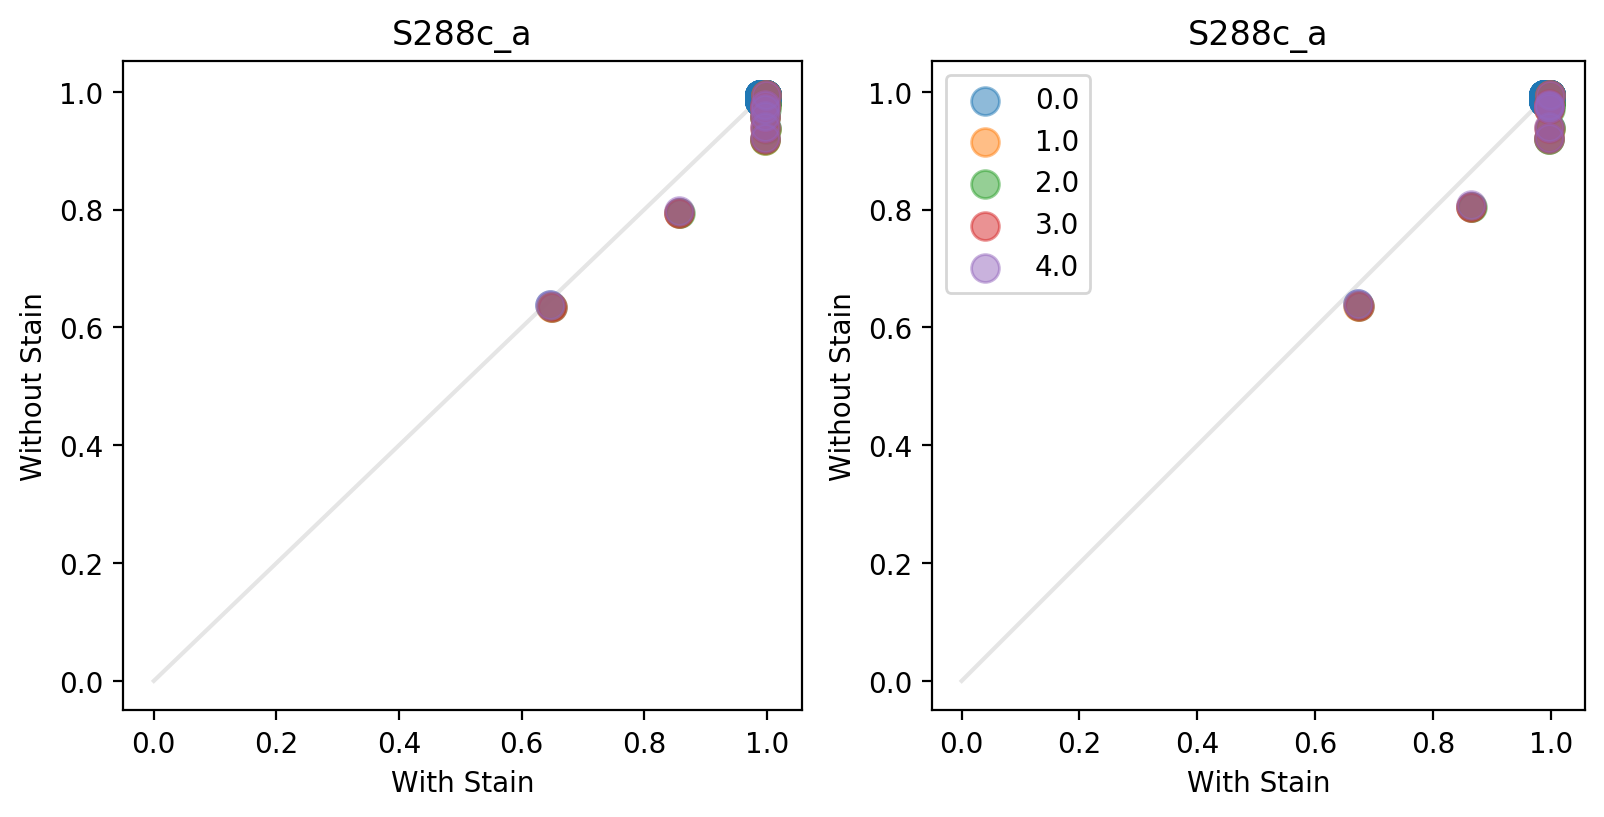

In [182]:
leader_board_df = blda.get_leader_board_df('.', expand_description=True)
bldp.get_stain_scatter(leader_board_df, experiments[2], experiment_strain=run_strain)

Index(['Container Type', 'Control', 'Culture_Volume', 'Media', 'Replicate', 'Storage (C)', 'Strain', 'checksum', 'filename', 'kill', 'kill_volume', 'plate_id', 'source', 'stain', 'well', 'experiment_id', 'Time', 'FSC-A', 'SSC-A', 'BL1-A', 'RL1-A', 'FSC-H', 'SSC-H', 'BL1-H', 'RL1-H', 'FSC-W', 'SSC-W', 'BL1-W', 'RL1-W', 'index', 'live', 'live_ss'], dtype='object')


Text(0.5, 0, 'Ethanol %')

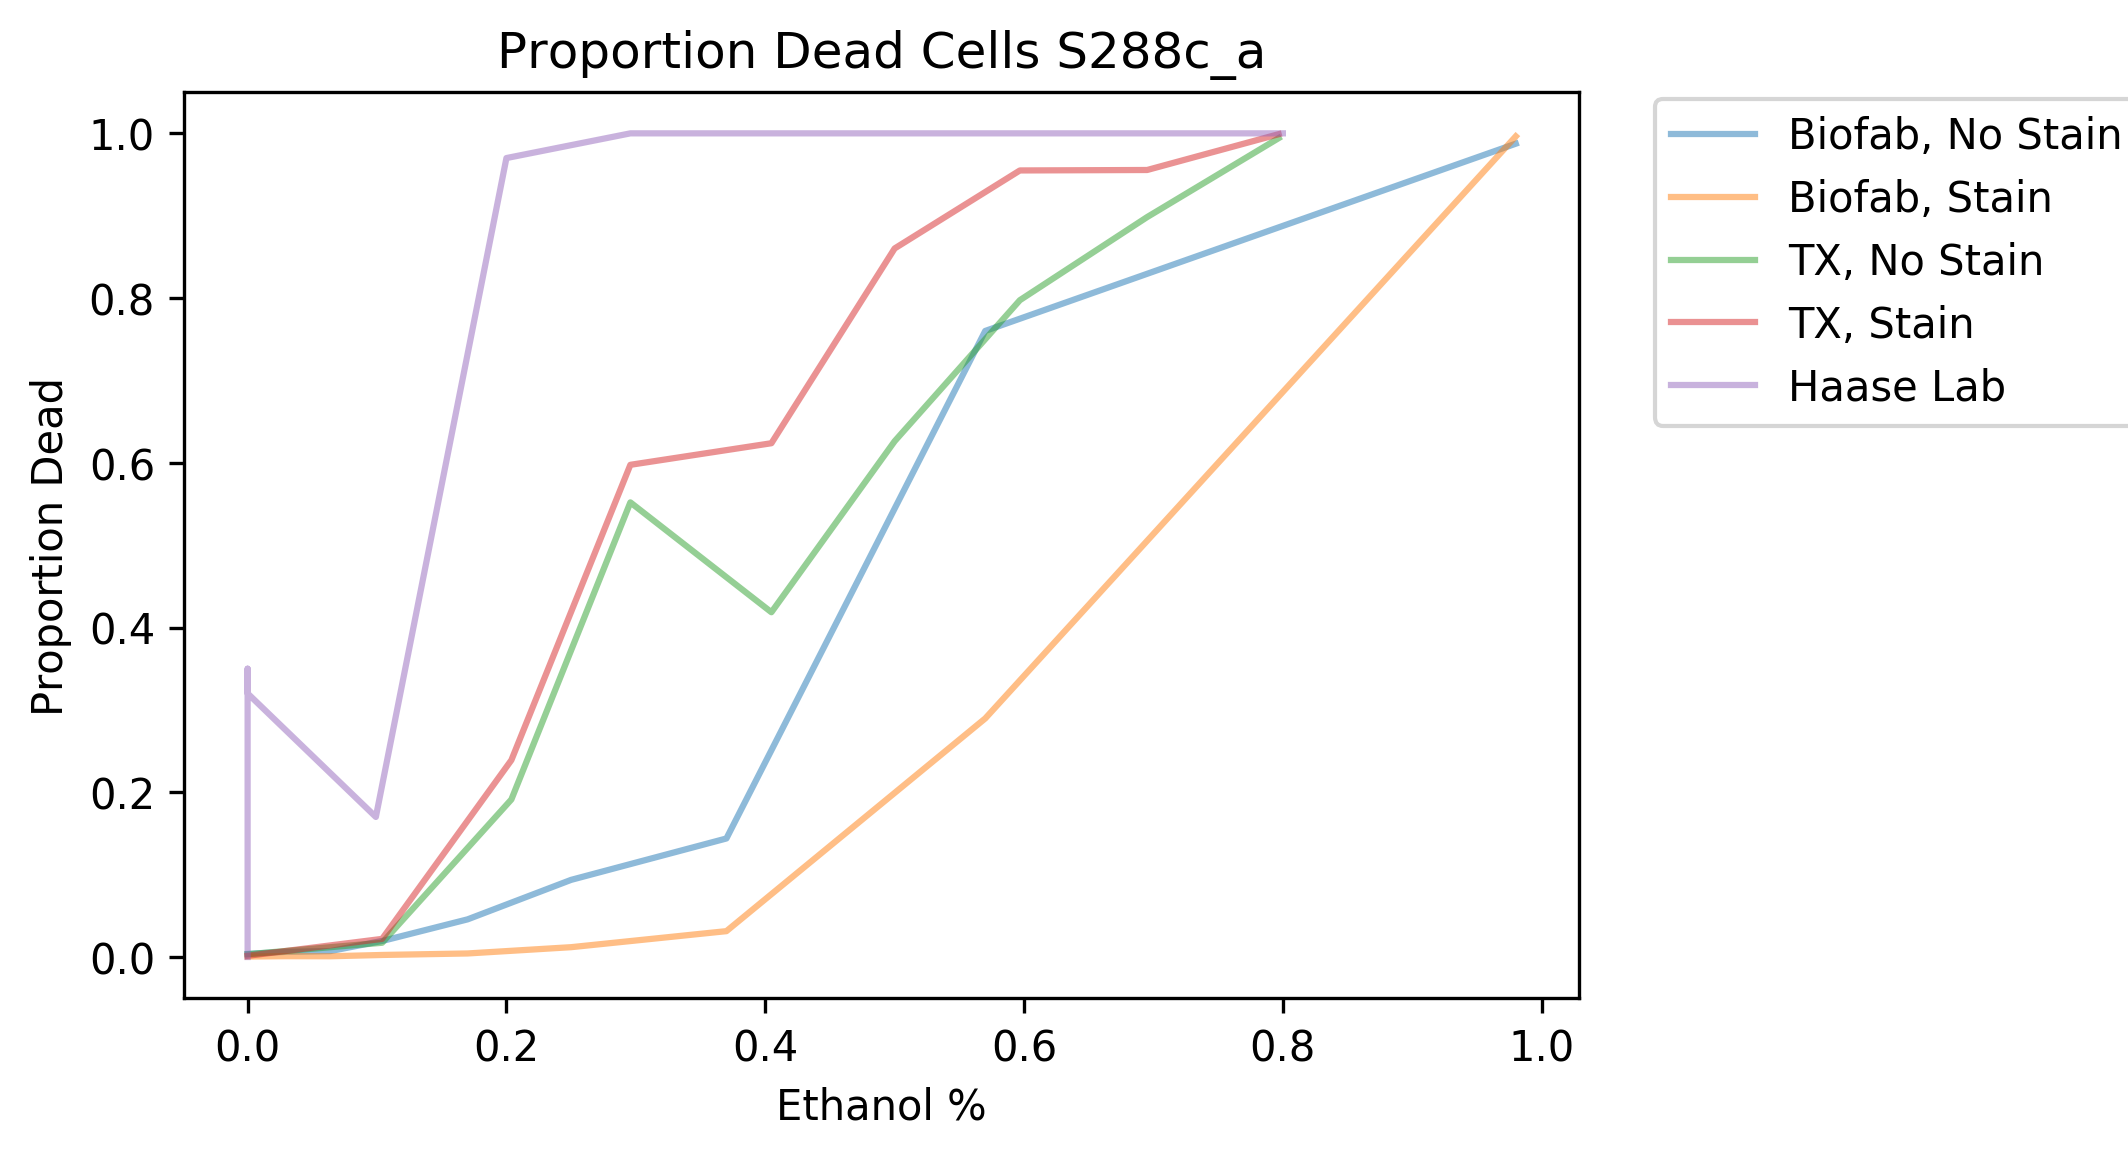

In [199]:
# For each sample, what proportion are dead?

robs_experiment = pd.read_csv('../resources/6-12_percent_dead.csv')

data_dir = os.path.join('data/biofab', experiments[1])
all_data_file = os.path.join(data_dir, 'data.csv')
experiment_df = pd.read_csv(all_data_file, index_col=0)


data_dir1 = os.path.join('data/transcriptic')
all_data_file1 = os.path.join(data_dir1, 'data.csv')
experiment_df1 = pd.read_csv(all_data_file1, index_col=0)
print(experiment_df1.columns)

#dead_proportion = experiment_df.where((pd.notnull(experiment_df)), "None").groupby(['kill_volume', 'sample_id', 'stain'])['live'].agg(lambda x: 1 - x.mean()).groupby(['kill_volume', 'stain']).agg(np.mean).reset_index().rename(columns={'live' : 'dead'})
dead_proportion = experiment_df.where((pd.notnull(experiment_df)), "None").groupby(['kill_volume',  'stain'])['live'].agg(lambda x: 1 - x.mean()).reset_index().rename(columns={'live' : 'dead'})
dead_proportion = dead_proportion.loc[dead_proportion.kill_volume != "None"]
#dead_proportion_ss = experiment_df.where((pd.notnull(experiment_df)), "None").groupby(['kill_volume', 'sample_id', 'stain'])['live_ss'].agg(lambda x: 1 - x.mean()).groupby(['kill_volume', 'stain']).agg(np.mean).reset_index().rename(columns={'live_ss' : 'dead_ss'})
dead_proportion_ss = experiment_df.where((pd.notnull(experiment_df)), "None").groupby(['kill_volume', 'stain'])['live_ss'].agg(lambda x: 1 - x.mean()).reset_index().rename(columns={'live_ss' : 'dead_ss'})
dead_proportion_ss = dead_proportion_ss.loc[dead_proportion_ss.kill_volume != "None"]


#dead_proportion1 = experiment_df1.where((pd.notnull(experiment_df1)), "None").groupby(['kill_volume', 'well', 'stain'])['live'].agg(lambda x: 1 - x.mean()).groupby(['kill_volume', 'stain']).agg(np.mean).reset_index().rename(columns={'live' : 'dead'})
dead_proportion1 = experiment_df1.where((pd.notnull(experiment_df1)), "None").groupby(['kill_volume', 'stain'])['live'].agg(lambda x: 1 - x.mean()).reset_index().rename(columns={'live' : 'dead'})
dead_proportion1 = dead_proportion1.loc[dead_proportion1.kill_volume != "None"]
dead_proportion1_ss = experiment_df1.where((pd.notnull(experiment_df1)), "None").groupby(['kill_volume', 'stain'])['live_ss'].agg(lambda x: 1 - x.mean()).reset_index().rename(columns={'live_ss' : 'dead_ss'})
dead_proportion1_ss = dead_proportion1_ss.loc[dead_proportion1_ss.kill_volume != "None"]



#experiment_id = experiment_df.experiment_id.dropna().unique()[0]
experiment_id = experiment_df.strain.dropna().unique()[0]
#print(dead_proportion)
fig = plt.figure(dpi=300)
ax = plt.subplot(111)
percentages=[ 100*x for x in [0, .03, .06, .10, .15, .20, .27, .36, .49]]

df=dead_proportion.loc[dead_proportion.stain == "None"]
ax.plot(df['kill_volume']/1000, df['dead'], label="Biofab, No Stain", alpha=0.5)
df=dead_proportion.loc[dead_proportion.stain == "SYTOX Red Stain"]
ax.plot(df['kill_volume']/1000, df['dead'], label="Biofab, Stain", alpha=0.5)
#df=dead_proportion_ss.loc[dead_proportion_ss.stain == "None"]
#ax.plot(df['kill_volume']/1000, df['dead_ss'], label="Biofab, No Stain, SS", alpha=0.5)
#df=dead_proportion_ss.loc[dead_proportion_ss.stain == "SYTOX Red Stain"]
#ax.plot(df['kill_volume']/1000, df['dead_ss'], label="Biofab, Stain, SS", alpha=0.5)


df=dead_proportion1.loc[dead_proportion1.stain == "None"]
ax.plot(df['kill_volume']/(df['kill_volume']+250), df['dead'], label="TX, No Stain", alpha=0.5)
df=dead_proportion1.loc[dead_proportion1.stain == "SYTOX Red Stain"]
ax.plot(df['kill_volume']/(df['kill_volume']+250), df['dead'], label="TX, Stain", alpha=0.5)
#df=dead_proportion1_ss.loc[dead_proportion1_ss.stain == "None"]
#ax.plot(df['kill_volume']/(df['kill_volume']+250), df['dead_ss'], label="TX, No Stain, SS", alpha=0.5)
#df=dead_proportion1_ss.loc[dead_proportion1_ss.stain == "SYTOX Red Stain"]
#ax.plot(df['kill_volume']/(df['kill_volume']+250), df['dead_ss'], label="TX, Stain, SS", alpha=0.5)


ax.plot(robs_experiment["Ethanol vol (ul)"]/(robs_experiment["Ethanol vol (ul)"]+robs_experiment["culture vol (ul)"]), 
        robs_experiment['% Dead'], label="Haase Lab", alpha=0.5)
#ax.bar()
#ax.set_xscale('log')
fig.legend(bbox_to_anchor=(1.2, 0.9))
plt.title("Proportion Dead Cells "  + experiment_id)
ax.set_ylabel("Proportion Dead")
ax.set_xlabel("Ethanol %")
#plt.xticks(range(0, len(volumes)), volumes)


Index(['Container Type', 'Control', 'Culture_Volume', 'Media', 'Replicate', 'Storage (C)', 'Strain', 'checksum', 'filename', 'kill', 'kill_volume', 'plate_id', 'source', 'stain', 'well', 'experiment_id', 'Time', 'FSC-A', 'SSC-A', 'BL1-A', 'RL1-A', 'FSC-H', 'SSC-H', 'BL1-H', 'RL1-H', 'FSC-W', 'SSC-W', 'BL1-W', 'RL1-W', 'index', 'live', 'live_ss'], dtype='object')


Text(0.5, 0, 'Ethanol %')

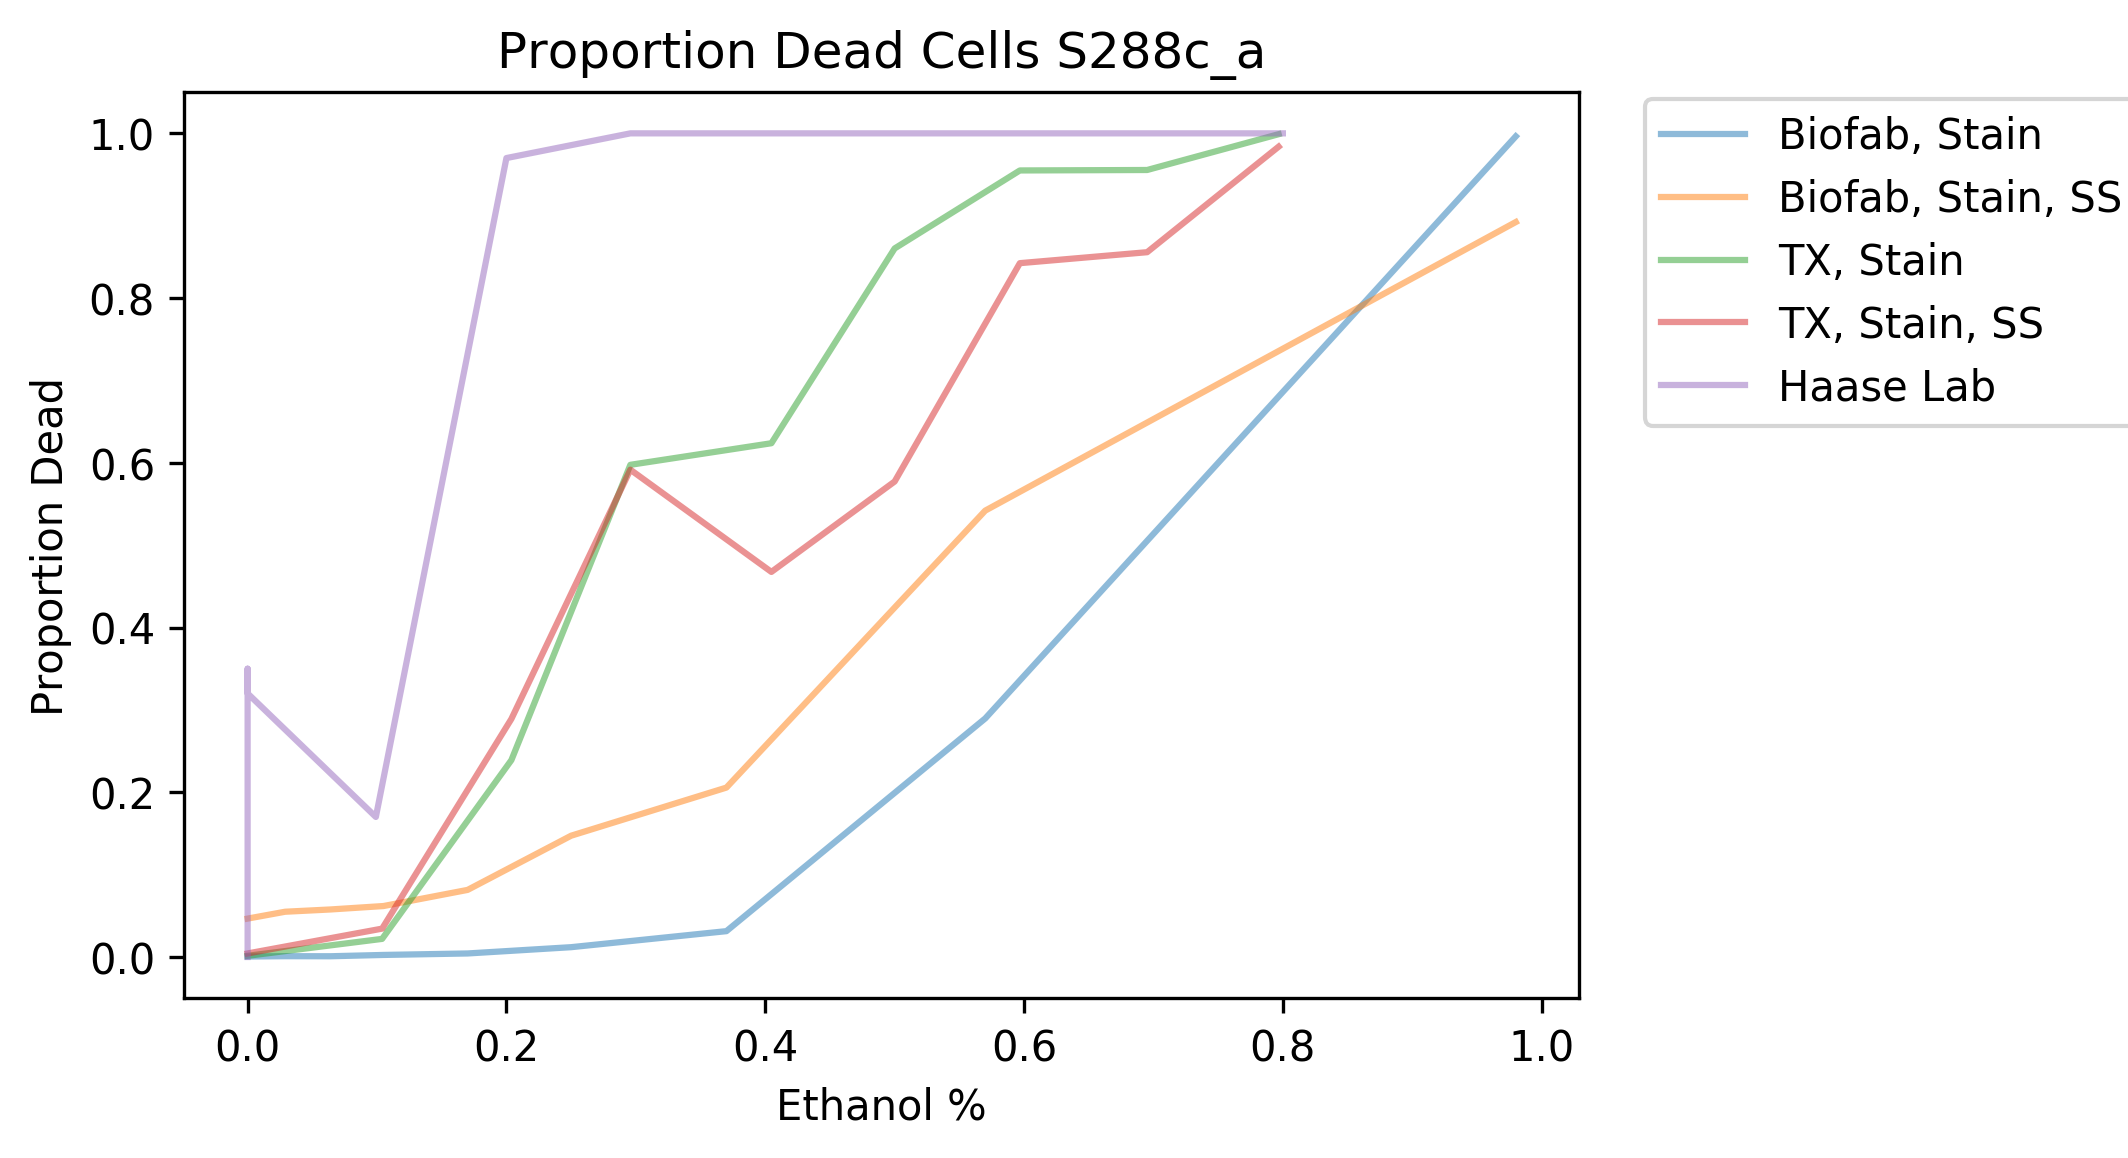

In [200]:
# For each sample, what proportion are dead?

robs_experiment = pd.read_csv('../resources/6-12_percent_dead.csv')

data_dir = os.path.join('data/biofab', experiments[1])
all_data_file = os.path.join(data_dir, 'data.csv')
experiment_df = pd.read_csv(all_data_file, index_col=0)


data_dir1 = os.path.join('data/transcriptic')
all_data_file1 = os.path.join(data_dir1, 'data.csv')
experiment_df1 = pd.read_csv(all_data_file1, index_col=0)
print(experiment_df1.columns)

#dead_proportion = experiment_df.where((pd.notnull(experiment_df)), "None").groupby(['kill_volume', 'sample_id', 'stain'])['live'].agg(lambda x: 1 - x.mean()).groupby(['kill_volume', 'stain']).agg(np.mean).reset_index().rename(columns={'live' : 'dead'})
dead_proportion = experiment_df.where((pd.notnull(experiment_df)), "None").groupby(['kill_volume',  'stain'])['live'].agg(lambda x: 1 - x.mean()).reset_index().rename(columns={'live' : 'dead'})
dead_proportion = dead_proportion.loc[dead_proportion.kill_volume != "None"]
#dead_proportion_ss = experiment_df.where((pd.notnull(experiment_df)), "None").groupby(['kill_volume', 'sample_id', 'stain'])['live_ss'].agg(lambda x: 1 - x.mean()).groupby(['kill_volume', 'stain']).agg(np.mean).reset_index().rename(columns={'live_ss' : 'dead_ss'})
dead_proportion_ss = experiment_df.where((pd.notnull(experiment_df)), "None").groupby(['kill_volume', 'stain'])['live_ss'].agg(lambda x: 1 - x.mean()).reset_index().rename(columns={'live_ss' : 'dead_ss'})
dead_proportion_ss = dead_proportion_ss.loc[dead_proportion_ss.kill_volume != "None"]


#dead_proportion1 = experiment_df1.where((pd.notnull(experiment_df1)), "None").groupby(['kill_volume', 'well', 'stain'])['live'].agg(lambda x: 1 - x.mean()).groupby(['kill_volume', 'stain']).agg(np.mean).reset_index().rename(columns={'live' : 'dead'})
dead_proportion1 = experiment_df1.where((pd.notnull(experiment_df1)), "None").groupby(['kill_volume', 'stain'])['live'].agg(lambda x: 1 - x.mean()).reset_index().rename(columns={'live' : 'dead'})
dead_proportion1 = dead_proportion1.loc[dead_proportion1.kill_volume != "None"]
dead_proportion1_ss = experiment_df1.where((pd.notnull(experiment_df1)), "None").groupby(['kill_volume', 'stain'])['live_ss'].agg(lambda x: 1 - x.mean()).reset_index().rename(columns={'live_ss' : 'dead_ss'})
dead_proportion1_ss = dead_proportion1_ss.loc[dead_proportion1_ss.kill_volume != "None"]



#experiment_id = experiment_df.experiment_id.dropna().unique()[0]
experiment_id = experiment_df.strain.dropna().unique()[0]
#print(dead_proportion)
fig = plt.figure(dpi=300)
ax = plt.subplot(111)
percentages=[ 100*x for x in [0, .03, .06, .10, .15, .20, .27, .36, .49]]

#df=dead_proportion.loc[dead_proportion.stain == "None"]
#ax.plot(df['kill_volume']/1000, df['dead'], label="Biofab, No Stain", alpha=0.5)
df=dead_proportion.loc[dead_proportion.stain == "SYTOX Red Stain"]
ax.plot(df['kill_volume']/1000, df['dead'], label="Biofab, Stain", alpha=0.5)
#df=dead_proportion_ss.loc[dead_proportion_ss.stain == "None"]
#ax.plot(df['kill_volume']/1000, df['dead_ss'], label="Biofab, No Stain, SS", alpha=0.5)
df=dead_proportion_ss.loc[dead_proportion_ss.stain == "SYTOX Red Stain"]
ax.plot(df['kill_volume']/1000, df['dead_ss'], label="Biofab, Stain, SS", alpha=0.5)


#df=dead_proportion1.loc[dead_proportion1.stain == "None"]
#ax.plot(df['kill_volume']/(df['kill_volume']+250), df['dead'], label="TX, No Stain", alpha=0.5)
df=dead_proportion1.loc[dead_proportion1.stain == "SYTOX Red Stain"]
ax.plot(df['kill_volume']/(df['kill_volume']+250), df['dead'], label="TX, Stain", alpha=0.5)
#df=dead_proportion1_ss.loc[dead_proportion1_ss.stain == "None"]
#ax.plot(df['kill_volume']/(df['kill_volume']+250), df['dead_ss'], label="TX, No Stain, SS", alpha=0.5)
df=dead_proportion1_ss.loc[dead_proportion1_ss.stain == "SYTOX Red Stain"]
ax.plot(df['kill_volume']/(df['kill_volume']+250), df['dead_ss'], label="TX, Stain, SS", alpha=0.5)


ax.plot(robs_experiment["Ethanol vol (ul)"]/(robs_experiment["Ethanol vol (ul)"]+robs_experiment["culture vol (ul)"]), 
        robs_experiment['% Dead'], label="Haase Lab", alpha=0.5)
#ax.bar()
#ax.set_xscale('log')
fig.legend(bbox_to_anchor=(1.2, 0.9))
plt.title("Proportion Dead Cells "  + experiment_id)
ax.set_ylabel("Proportion Dead")
ax.set_xlabel("Ethanol %")
#plt.xticks(range(0, len(volumes)), volumes)


In [162]:
dead_proportion['kill_volume'].unique()

array([0.0, 29.0, 64.0, 105.0, 170.0, 250.0, 370.0, 570.0, 980.0],
      dtype=object)

In [155]:
dead_proportion1['kill_volume']/(dead_proportion1['kill_volume']+1000)

0     0        
1     0        
2     0.0281827
3     0.0281827
4     0.0601504
5     0.0601504
6     0.0950226
7     0.0950226
8     0.145299 
9     0.145299 
10    0.2      
11    0.2      
12    0.270073 
13    0.270073 
14    0.363057 
15    0.363057 
16    0.494949 
17    0.494949 
Name: kill_volume, dtype: object

In [112]:
robs_experiment

Treatment  % Dead  culture vol (ul)  Ethanol vol (ul)  % Ethanol
0   Control 1    0.00    1000              0                 0.0      
1   Control 2    0.35    1000              0                 0.0      
2   Control 3    0.32    1000              0                 0.0      
3   10% Ethanol  0.17    1000              110               0.1      
4   20% Ethanol  0.97    1000              250               0.2      
5   30% Ethanol  1.00    1000              420               0.3      
6   40% Ethanol  1.00    1000              680               0.4      
7   50% Ethanol  1.00    1000              1000              0.5      
8   60% Ethanol  1.00    1000              1500              0.6      
9   70% Ethanol  1.00    1000              2300              0.7      
10  80% Ethanol  1.00    1000              4000              0.8

In [123]:
df = experiment_df.loc[experiment_df['stain'].isna()].groupby(['kill_volume']).agg(np.mean).reset_index()

#df = df.loc[df['live'] == 1]
df

kill_volume  level  stain_volume  temperature         FSC-A         SSC-A        FL1-A        FL2-A        FL3-A       FL4-A         FSC-H         SSC-H        FL1-H        FL2-H        FL3-H        FL4-H      Width         Time         index      live
0  0.0          0.0   NaN            30.0         1.286958e+06  1.346926e+05  1034.457842  409.249025   817.285917   484.002983  1.514119e+06  1.588075e+05  1102.681267  417.542842   1269.059825  1046.516600  55.733767  166.176275   1.681295e+06  0.996225
1  29.0         0.0   NaN            30.0         1.283254e+06  1.350910e+05  1100.840575  429.722700   830.089258   482.576242  1.511980e+06  1.602445e+05  1131.949533  425.528267   1267.778275  1037.558133  55.420317  172.123733   1.651295e+06  0.993825
2  64.0         0.0   NaN            30.0         1.327215e+06  1.396662e+05  1155.489992  450.612192   845.800992   477.385867  1.573616e+06  1.672782e+05  1156.600600  431.930358   1261.812567  1020.837942  55.454492  180.282150   1.621295e+06  0.992908
3  105.0        0.0   NaN            30.0         1.210569e+06  1.187208e+05  1357.343375  536.261992   909.310733   446.509117  1.520150e+06  1.479912e+05  1196.947225  450.858317   1205.484242  915.252608   52.569433  200.472917   1.591295e+06  0.980442
4  170.0        0.0   NaN            30.0         1.129597e+06  1.105586e+05  1688.059867  660.114983   1058.230917  435.610025  1.454739e+06  1.428065e+05  1347.158267  505.103033   1233.973692  856.343450   50.849417  213.475350   1.561295e+06  0.954908
5  250.0        0.0   NaN            30.0         1.102304e+06  1.224289e+05  1778.637417  746.022500   1270.381408  428.945992  1.453162e+06  1.640119e+05  1374.540433  545.722125   1312.070092  816.487292   49.521858  224.883983   1.531295e+06  0.906800
6  370.0        0.0   NaN            30.0         1.204099e+06  1.498971e+05  2058.188600  832.691267   1410.405200  423.631517  1.533997e+06  1.970778e+05  1446.702367  565.731750   1317.636283  757.163508   51.483933  288.179533   1.501295e+06  0.856575
7  570.0        0.0   NaN            30.0         5.601816e+05  5.962937e+04  1528.297278  663.694736   1087.972940  377.015997  8.745471e+05  8.928961e+04  1339.074282  526.822553   1094.555739  598.788861   35.643375  1164.383878  1.472637e+06  0.240156
8  980.0        0.0   NaN            30.0         8.247590e+06  8.702108e+06  6137.294449  1982.232979  5057.568651  576.887095  3.113633e+06  3.605369e+06  4312.516738  1338.120727  2729.913705  606.483362   88.798888  1892.149048  1.653739e+06  0.012299

1    1750162
0    348498 
Name: live, dtype: int64
['SYTOX Red Stain' nan]
                                             agave_path         agave_system challenge_problem               experiment_id                experiment_reference                                                         experiment_reference_url file_type                                                                                     filename                                                                                     hpc_path                                                                      jupyter_path kill_method  kill_volume kill_volume_unit        lab  level measurement_type                                           sample_id            stain  stain_volume stain_volume_unit   strain         strain_lab_id                                   strain_sbh_uri  temperature      FSC-A      SSC-A     FL1-A    FL2-A    FL3-A    FL4-A      FSC-H      SSC-H    FL1-H    FL2-H    FL3-H   FL4-H  Width   Time  index

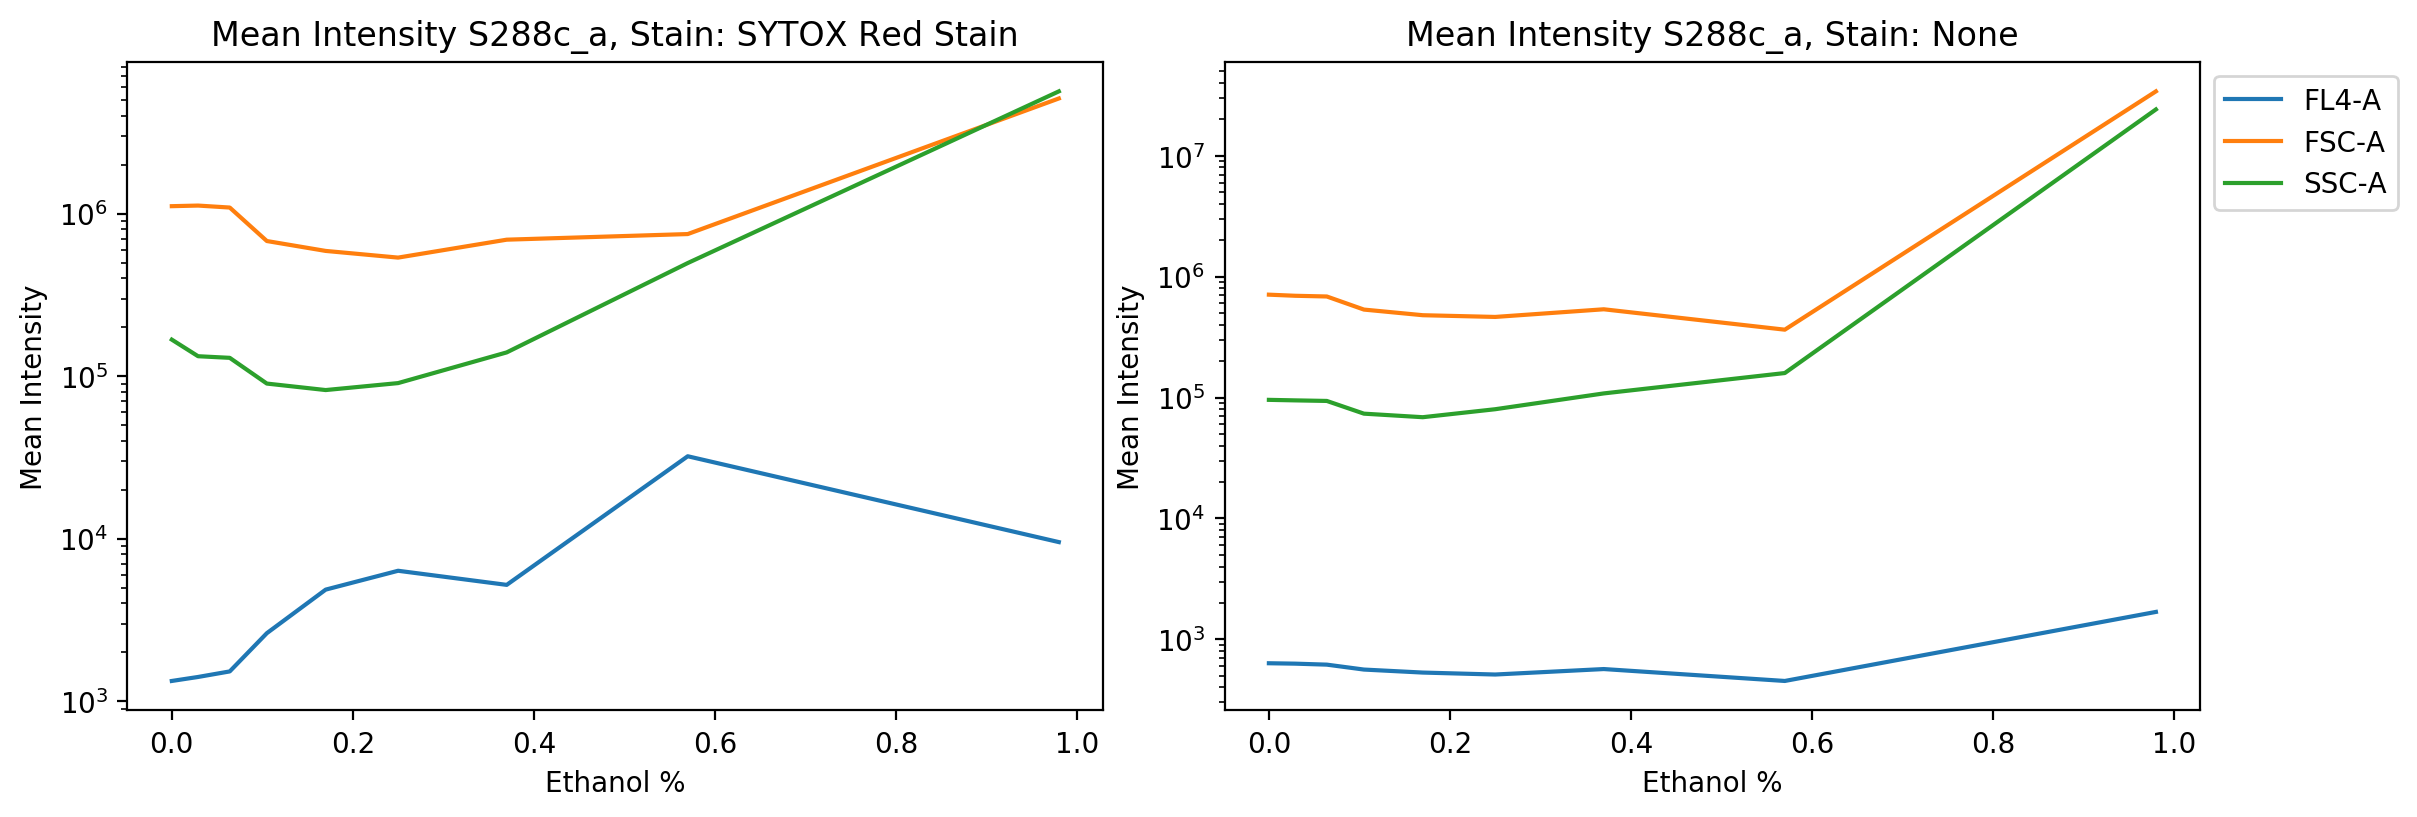

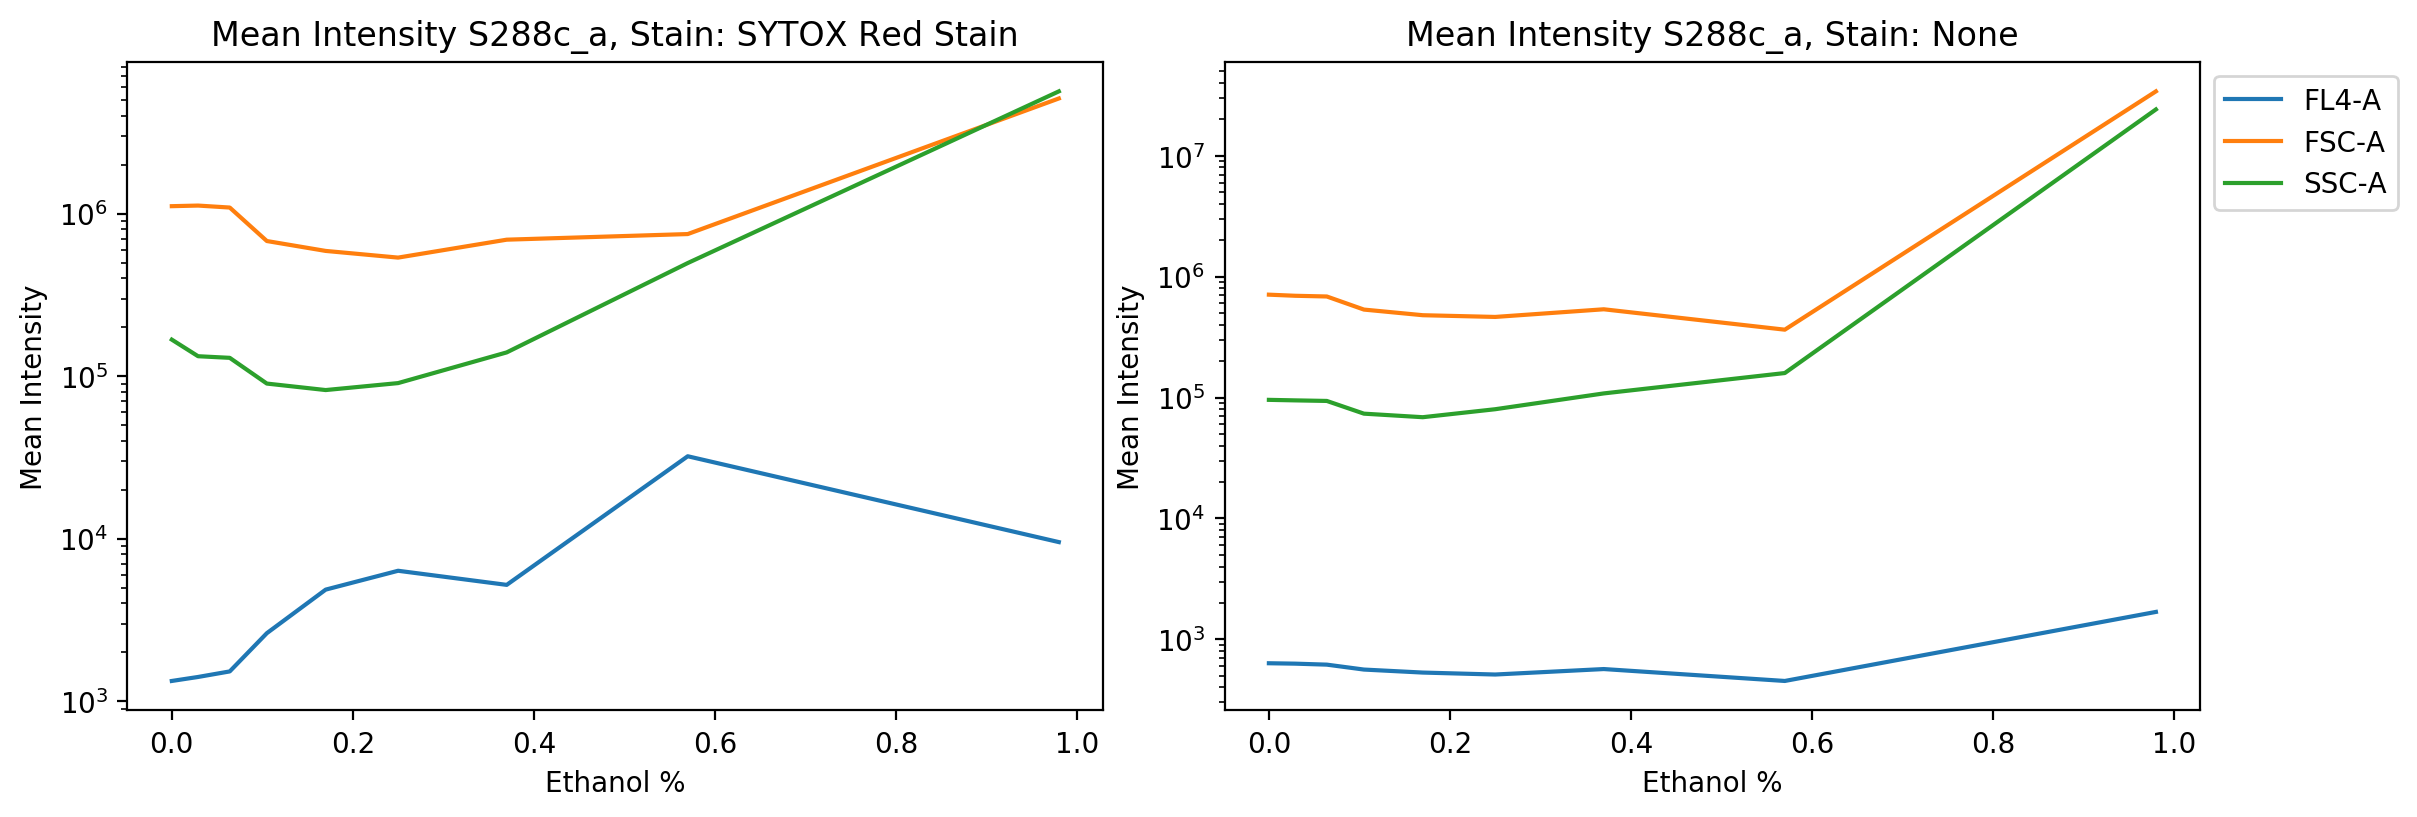

In [193]:
data_dir = os.path.join('data/biofab', experiments[1])
all_data_file = os.path.join(data_dir, 'data.csv')
experiment_df = pd.read_csv(all_data_file, index_col=0)
print(experiment_df.live.value_counts())
channels=['FSC-A', 'SSC-A', 'FL4-A']
bldp.get_channel_mean_titration(experiment_df, only_live=False, channels=channels,stat=np.std)

['SYTOX Red Stain' nan]
  Container Type Control                  Culture_Volume                                                                                                                                                              Media Replicate Storage (C)                                                                                                                                                           Strain                                  checksum                                                                                    filename     kill  kill_volume  plate_id            source            stain well   experiment_id  Time      FSC-A      SSC-A   BL1-A    RL1-A    FSC-H     SSC-H  BL1-H    RL1-H   FSC-W   SSC-W  BL1-W  RL1-W  index  live  live_ss
0  96-pcr         {}      {'qty': 1000.0, 'units': 'uL'}  {'YPAD': {'item_id': 378596, 'item_concentration': None, 'final_concentration': None, 'dilution_factor': None, 'working_volume': {'qty': 1000.0, 'units': 'µl'}}}

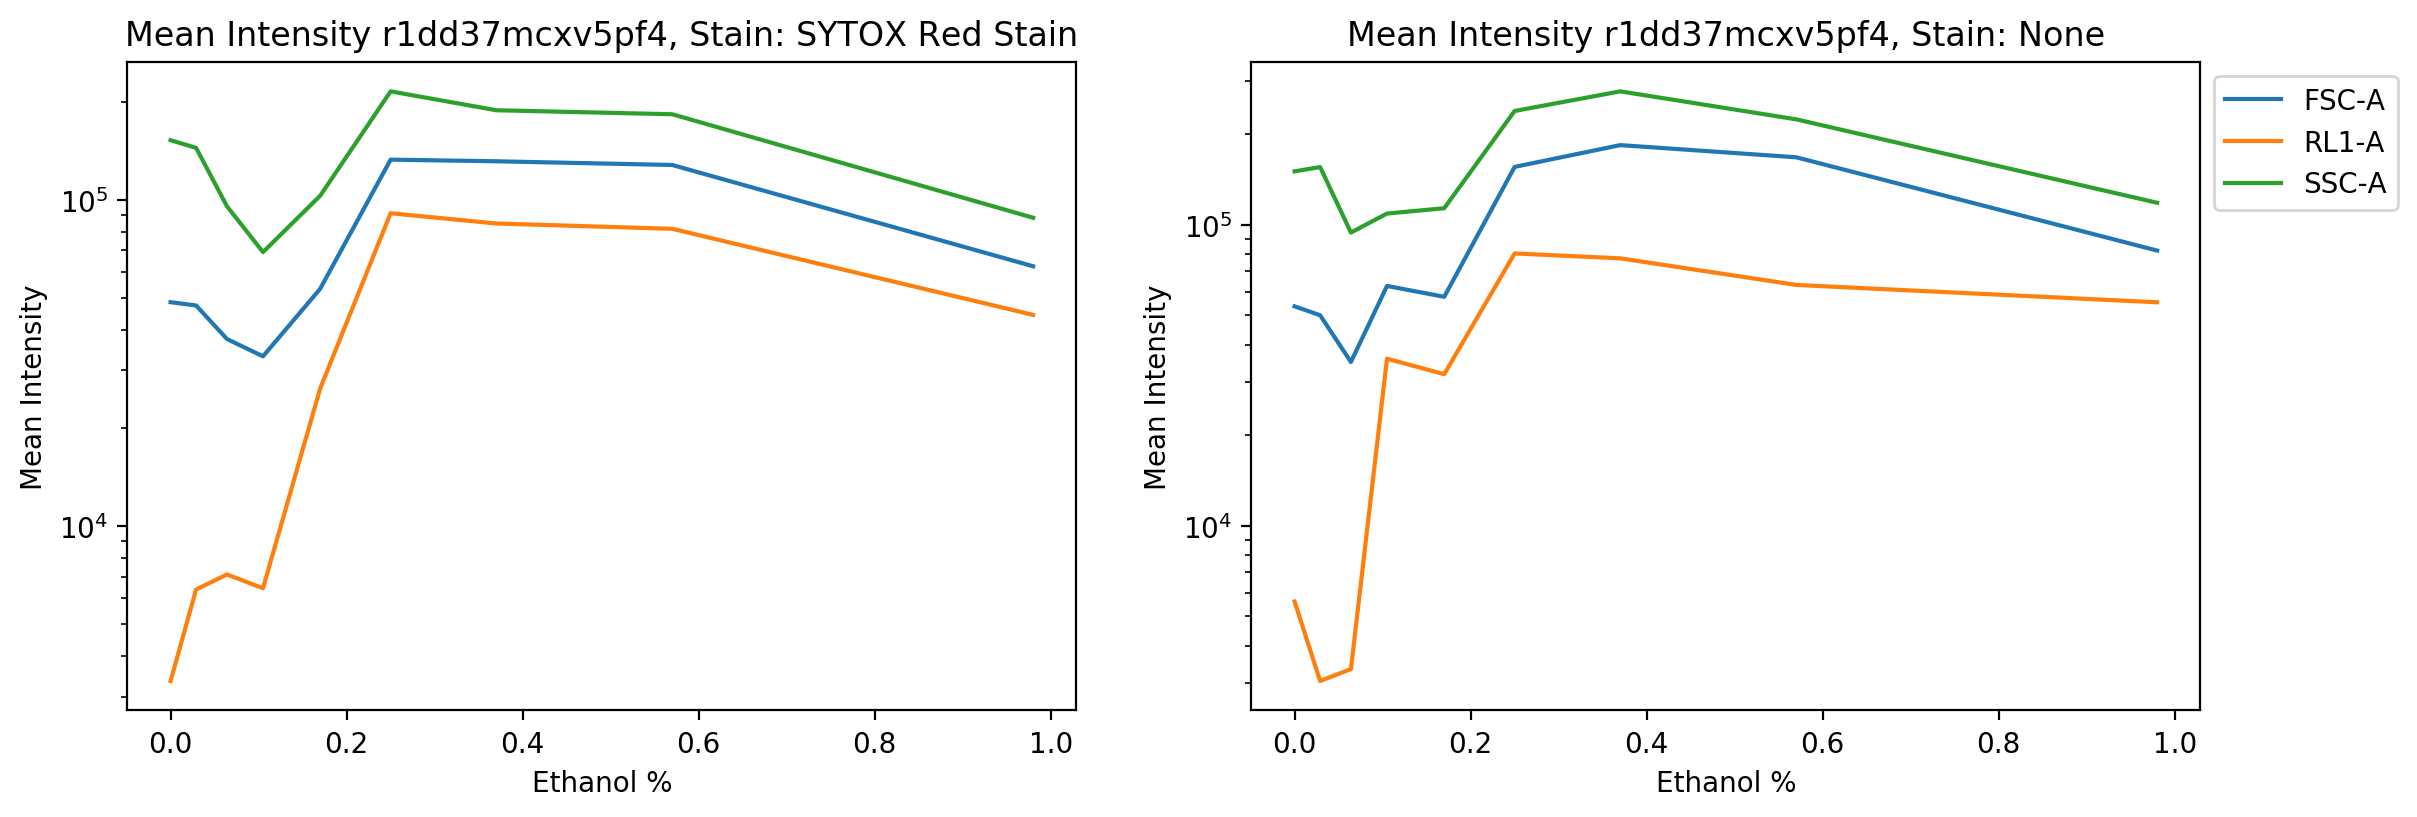

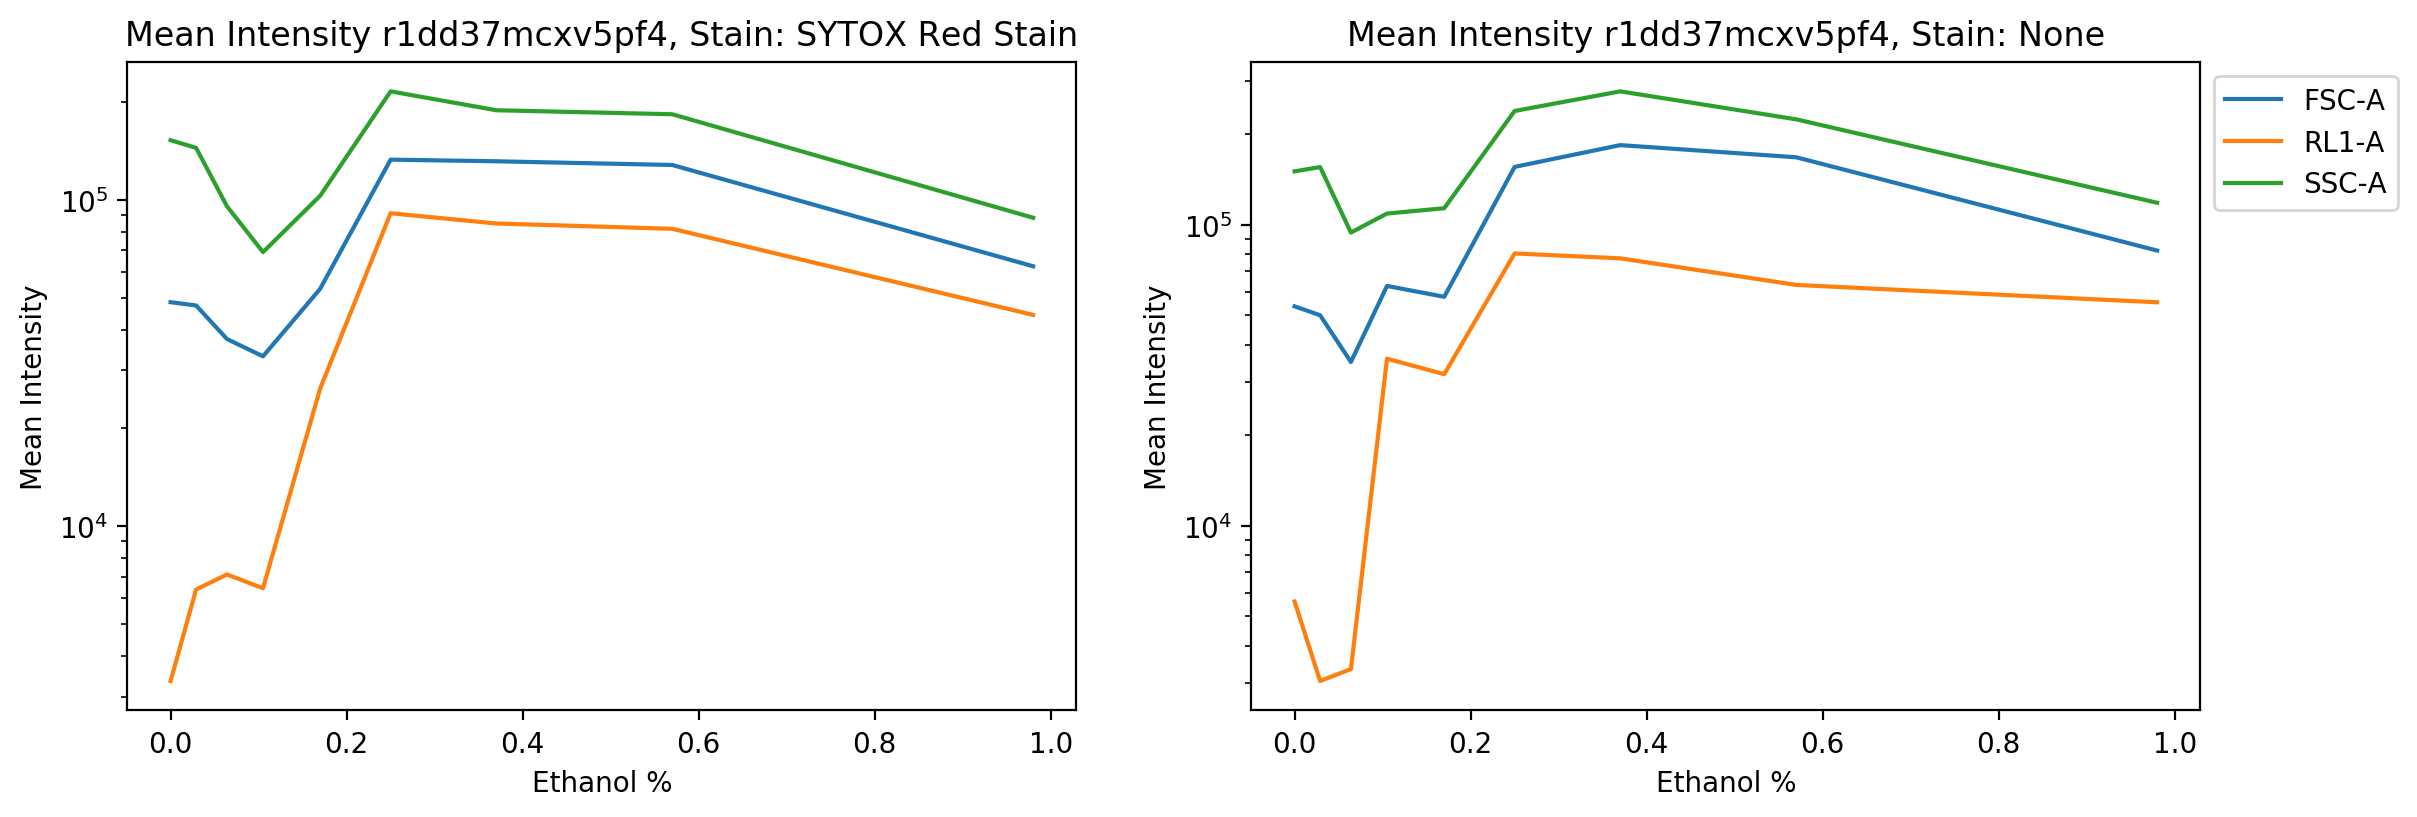

In [194]:
data_dir = os.path.join('data/transcriptic')
all_data_file = os.path.join(data_dir, 'data.csv')
experiment_df = pd.read_csv(all_data_file, index_col=0)


channels=['FSC-A', 'SSC-A', 'BL1-A', 'RL1-A', 'FSC-H', 
                                      'SSC-H', 'BL1-H', 'RL1-H', 'FSC-W', 'SSC-W',
                                      'BL1-W', 'RL1-W']
channels=['FSC-A', 'SSC-A', 'RL1-A']
bldp.get_channel_mean_titration(experiment_df, 
                               channels=channels,
                                stat=np.std
                               )

In [128]:
data_dir = os.path.join('data/biofab', experiments[1])
all_data_file = os.path.join(data_dir, 'data.csv')
experiment_df = pd.read_csv(all_data_file, index_col=0)

bldp.get_channel_histograms(experiment_df)

[autoreload of pysd2cat.plot.biofab_live_dead_plots failed: Traceback (most recent call last):
  File "/Users/danbryce/Documents/sift/xplan/external/xplan/xplan-to-autoprotocol-reactor/xplan-dev-env/xplan-dev-env/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/danbryce/Documents/sift/xplan/external/xplan/xplan-to-autoprotocol-reactor/xplan-dev-env/xplan-dev-env/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 434, in superreload
    module = reload(module)
  File "/Users/danbryce/Documents/sift/xplan/external/xplan/xplan-to-autoprotocol-reactor/xplan-dev-env/xplan-dev-env/lib/python3.7/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/Users/danbryce/Documents/sift/xplan/external/xplan/xplan-to-autoprotocol-reactor/xplan-dev-env/xplan-dev-env/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen im

In [111]:
data_dir = os.path.join('data/transcriptic')
all_data_file = os.path.join(data_dir, 'data.csv')
experiment_df = pd.read_csv(all_data_file, index_col=0)

#bldp.get_channel_mean_titration(experiment_df)
bldp.get_channel_histograms(experiment_df, 
                               channels=['FSC-A', 'SSC-A', 'BL1-A', 'RL1-A', 'FSC-H', 
                                      'SSC-H', 'BL1-H', 'RL1-H', 'FSC-W', 'SSC-W',
                                      'BL1-W', 'RL1-W'])

In [159]:
all=experiment_df.loc[experiment_df['kill_volume'] == 250.0]['FL1-A'].sum()
live=experiment_df.loc[(experiment_df['kill_volume'] == 250.0) & (experiment_df['live'] == 1)]['FL1-A'].sum()
ratio = live/all
print(all)
print(live)
print(ratio)
print(experiment_df.loc[(experiment_df['kill_volume'] == 250.0)]['live'].mean())

407045863.0
376115824.0
0.9240133807722792
0.953375
